# **1. Business Understanding**
<img src="https://www.nyc.gov/assets/tlc/images/content/pages/about/about-tlc.png" width="500" height="300">

## **1.1. Backrgound**

The New York City Taxi & Limousine Commission (TLC) is an official government agency established in 1971, tasked with regulating and overseeing taxi and limousine transportation services in New York City. The TLC is responsible for ensuring the safety, service quality, and fare structures of yellow cabs, green cabs, limousines, and other vehicles, including rideshare services like Uber and Lyft. The commission ensures that every vehicle operating in the city complies with established regulations, including the use of electronic payment systems. 

As of January 2023, the TLC had licensed approximately 174,924 drivers, encompassing taxi drivers, for-hire vehicles (FHV), paratransit, and commuter vehicles. The TLC continuously evaluates and updates its regulations to support the growth and sustainability of the transportation sector.

<img src="https://fasttrackleasingllc.com/wp-content/uploads/2022/05/100-1024x640.jpg"  width="500" height="300"> 



---
## **1.2. Objective Analysis**

**Customer Behavior Pattern:**
1. How does the frequency of taxi trips compare between weekdays and weekends?
2. At what time does the busiest taxi travel occur?
3. Which pickup and dropoff zones are most frequently selected by customers?
4. What payment method is most commonly used by customers?
5. What booking method is most frequently used by customers?

**Operational & Performance:**

1. Does congestion affect taxi trip duration?
2. How does the average revenue compare across vendors?
3. What is the total number of trips performed by each vendor?
4. What is the total distance traveled for all trips by vendor?
5. How does the average revenue compare across vendors?
6. What is the total number of trips by vendor?


## **1.3. Project Goals**

With the analysis of customer behavior patterns, operations, and performance from the NYC TLC Trip Record, it is expected to:

1. Understand customers to provide more personalized and satisfying services.
2. Improve operational efficiency through fleet distribution and congestion management strategies.
3. Maximize company performance and revenue by improving data-driven and analytical services.

---
# **2. Import Data**
To answer the question above, we will analyze the New York TLC Trip Record data. The dataset can be accessed [here](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N).

In [547]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


---
# **3. Exploratory Data Analysis (EDA)**

## **3.1. Data Understanding**

This dataset contains taxi trip records managed by the New York City Taxi & Limousine Commission (TLC). The data comes from two electronic payment technology vendors, namely Creative Mobile Technologies, LLC, and VeriFone Inc. The dataset includes information about taxi trips, payment methods, pickup and dropoff location zones, as well as fare details.

The New York City TLC Trip Record dataset consists of 20 columns, divided as follows:

**Continuous Numerical Variables:**
- trip_distance
- fare_amount
- extra
- mta_tax
- tip_amount
- tolls_amount
- improvement_surcharge
- total_amount
- congestion_surcharge
- ehail_fee (if data is available)

**Discrete Numerical Variables:**
- passenger_count

**Categorical Nominal Variables:**
- VendorID
- store_and_fwd_flag
- RatecodeID
- PULocationID
- DOLocationID
- payment_type
- trip_type

**Time Variables:**
- lpep_pickup_datetime
- lpep_dropoff_datetime

**Key Features:**
1. **VendorID**: A unique ID for the electronic payment technology system provider used by the taxi.

    - 1 = Creative Mobile Technologies, LLC
    - 2 = VeriFone Inc.
    
2. **lpep_pickup_datetime**: The date and time when the taxi meter is activated at the time of pickup.

3. **lpep_dropoff_datetime**: The date and time when the taxi meter is deactivated at the time of dropoff.

4. **store_and_fwd_flag**: An indicator showing whether the trip data was stored in the vehicle's memory before being sent to the server:

    - Y = Trip data was stored in the vehicle's memory first, then sent to the server.
    - N = Trip data was sent directly to the server in real-time without being stored.

5. **RatecodeID**: The fare code applied at the end of the trip:

    - 1 = Standard fare
    - 2 = JFK (John F. Kennedy Airport)
    - 3 = Newark (Newark Airport)
    - 4 = Nassau or Westchester
    - 5 = Negotiated fare
    - 6 = Group ride

6. **PULocationID**: The taxi zone ID of the pickup location when the meter is activated.

7. **DOLocationID**: The taxi zone ID of the dropoff location when the meter is deactivated.

8. **passenger_count**: The number of passengers in the vehicle (manually entered by the driver).

9. **trip_distance**: The trip distance in miles (1 mile = 1.069 km) measured by the taxi meter during the trip.

10. **fare_amount**: The fare for the trip, calculated based on distance and time, including additional charges:

    - $0.50 (rush hour surcharge)
    - $1 (night surcharge)

11. **extra**: Additional charges separate from the fare_amount, typically related to specific conditions (e.g., driver waiting time).

12. **mta_tax**: A $0.50 MTA (Metropolitan Transportation Authority) tax automatically applied based on the fare used.

13. **tip_amount**: The amount of tip given by the passenger. This data is automatically populated for tips paid by credit card (excluding cash tips).

14. **tolls_amount**: The total toll fees paid during the trip.

15. **ehail_fee**: A fee charged when the trip is booked via an e-hail app (e.g., Uber, Lyft) to support digital booking.

16. **improvement_surcharge**: An additional $0.30 surcharge applied to taxi trips, implemented since 2015.

17. **total_amount**: The total fare charged to the passenger, excluding cash tips.

    **(total_amount = fare_amount + extra + mta_tax + tip_amount + tolls_amount + improvement_surcharge + congestion_surcharge)**

18. **payment_type**: A numerical code representing the payment method used by the passenger:

    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Payment dispute
    - 5 = Unknown
    - 6 = Voided trip

19. **trip_type**: A code indicating the type of trip, whether booked via an app or dispatched through the street hail system:

    - 1 = Street-hail (flagged down on the street)
    - 2 = Dispatch (driver sent based on a phone call to TLC)

20. **congestion_surcharge**: An additional fee charged for trips that begin, end, or pass through a congested area of traffic, specifically Manhattan South of 96th Street:

    - Yellow Cabs: $2.50
    - Green Cabs & Limousine: $2.75

---

In [548]:
df = pd.read_csv("NYC TLC Trip Record.csv")
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


### **3.1.1. Check Data Info**

In [549]:
print(f'The number of rows and columns in this dataset is {df.shape[0]} rows & {df.shape[1]} columns')
print(f'The index starts from {df.index}')

The number of rows and columns in this dataset is 68211 rows & 20 columns
The index starts from RangeIndex(start=0, stop=68211, step=1)


In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

---
**The data types that need adjustment are as follows:**  

1. **VendorID, store_and_fwd_flag, RatecodeID, payment_type, trip_type**  
   - **Initial Type**: int64 / object  
   - **New Type**: category  
   - **Reason**: These columns represent categorical data (vendor identity, rate codes, locations, payment methods, trip types), making the `category` type more appropriate for categorical analysis.  

2. **lpep_pickup_datetime & lpep_dropoff_datetime**  
   - **Initial Type**: object  
   - **New Type**: datetime  
   - **Reason**: These columns contain time data that need to be converted to the `datetime` format to support time-based operations, such as calculating trip duration and time analysis.  

3. **passenger_count**  
   - **Initial Type**: float64  
   - **New Type**: int  
   - **Reason**: Passenger count is an integer value, so using the `int` type is more appropriate.  

The adjustments will be implemented during the data preprocessing and data cleaning stages.  

---
### **3.1.2. Unique Values**

In [551]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

---
### **3.1.3. Descriptive Statistic**

> Statistical Description of Numerical Columns


In [552]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


> Statistical Description of Non-Numerical Columns -> object & category  

In [553]:
df.describe(include='object')

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


---
### **3.1.4. Missing Values**

In [554]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

> missing value percentage

In [555]:
df.isna().sum()/len(df)*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

In [556]:
df.columns[df.isna().any()]

Index(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [557]:
missing_per_row = df.isna().sum(axis=1)
missing_per_row.value_counts()

1    63877
7     4324
2       10
Name: count, dtype: int64

In [558]:
missing_row = df.isna()
unique_missing_patterns = missing_row.drop_duplicates()
print(f"Jumlah pola missing values unik: {len(unique_missing_patterns)}")
pattern_counts = missing_row.value_counts()
print(pattern_counts)

Jumlah pola missing values unik: 3
VendorID  lpep_pickup_datetime  lpep_dropoff_datetime  store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  improvement_surcharge  total_amount  payment_type  trip_type  congestion_surcharge
False     False                 False                  False               False       False         False         False            False          False        False  False    False       False         True       False                  False         False         False      False                   63877
                                                       True                True        False         False         True             False          False        False  False    False       False         True       False                  False         True          True       True                     4324
                                                       Fals

Based on the missing value check above, it is observed that the columns with missing values are store_and_fwd_flag, RatecodeID, passenger_count, ehail_fee, payment_type, trip_type, and congestion_surcharge.

1. The **ehail_fee** column is 100% empty, which means there is no information available. Therefore, the **ehail_fee** column will be removed.

2. The **store_and_fwd_flag**, **RatecodeID**, **passenger_count**, **payment_type**, **trip_type**, and **congestion_surcharge** columns have missing values in the same rows:
   - **Passenger_count** is an important column containing passenger information. It is unlikely for a taxi to have no passengers, so this column can be filled with at least 1 passenger or the median/mean of the existing data.
   - **store_and_fwd_flag** will be filled with the mode of the existing data.
   - **RatecodeID** will be filled with the mode of the existing data.
   - **payment_type** will be filled based on its relationship with other columns (tip_amount, lpep_pickup_datetime, & lpep_dropoff_datetime).
   - **trip_type** will be filled with the mode of the existing data and based on its relationship with the **RatecodeID** column.
   - **congestion_surcharge** will be filled based on the relationship with the **PULocationID** and **DOLocationID** columns.

The handling of incorrect data types, missing values, and outliers discussed above will be carried out during the **data cleaning** stage.

---
### **3.1.5. Data Duplicates**

In [559]:
df.duplicated().sum()

0

In [560]:
df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge']).sum()


0

> No duplicate data were found in this dataset

---
### **3.1.6. Normality Test**

In [561]:
numerical_columns = df.describe().columns

from scipy.stats import shapiro

for col in numerical_columns:
    stat, p = shapiro(df[col])
    if p > 0.05:
        print(f"{col}: Data follows a normal distribution (p-value={p:.3f})")
    else:
        print(f"{col}: Data does not follow a normal distribution (p-value={p:.3f})")


VendorID: Data does not follow a normal distribution (p-value=0.000)
RatecodeID: Data does not follow a normal distribution (p-value=nan)
PULocationID: Data does not follow a normal distribution (p-value=0.000)
DOLocationID: Data does not follow a normal distribution (p-value=0.000)
passenger_count: Data does not follow a normal distribution (p-value=nan)
trip_distance: Data does not follow a normal distribution (p-value=0.000)
fare_amount: Data does not follow a normal distribution (p-value=0.000)
extra: Data does not follow a normal distribution (p-value=0.000)
mta_tax: Data does not follow a normal distribution (p-value=0.000)
tip_amount: Data does not follow a normal distribution (p-value=0.000)
tolls_amount: Data does not follow a normal distribution (p-value=0.000)
ehail_fee: Data does not follow a normal distribution (p-value=nan)
improvement_surcharge: Data does not follow a normal distribution (p-value=0.000)
total_amount: Data does not follow a normal distribution (p-value=0.

> The normality test results indicate that none of the variables follow a normal distribution (p-value = 0.000), likely due to the presence of outliers and the high variability of values in the dataset.

---

### **3.1.7. Correlation**

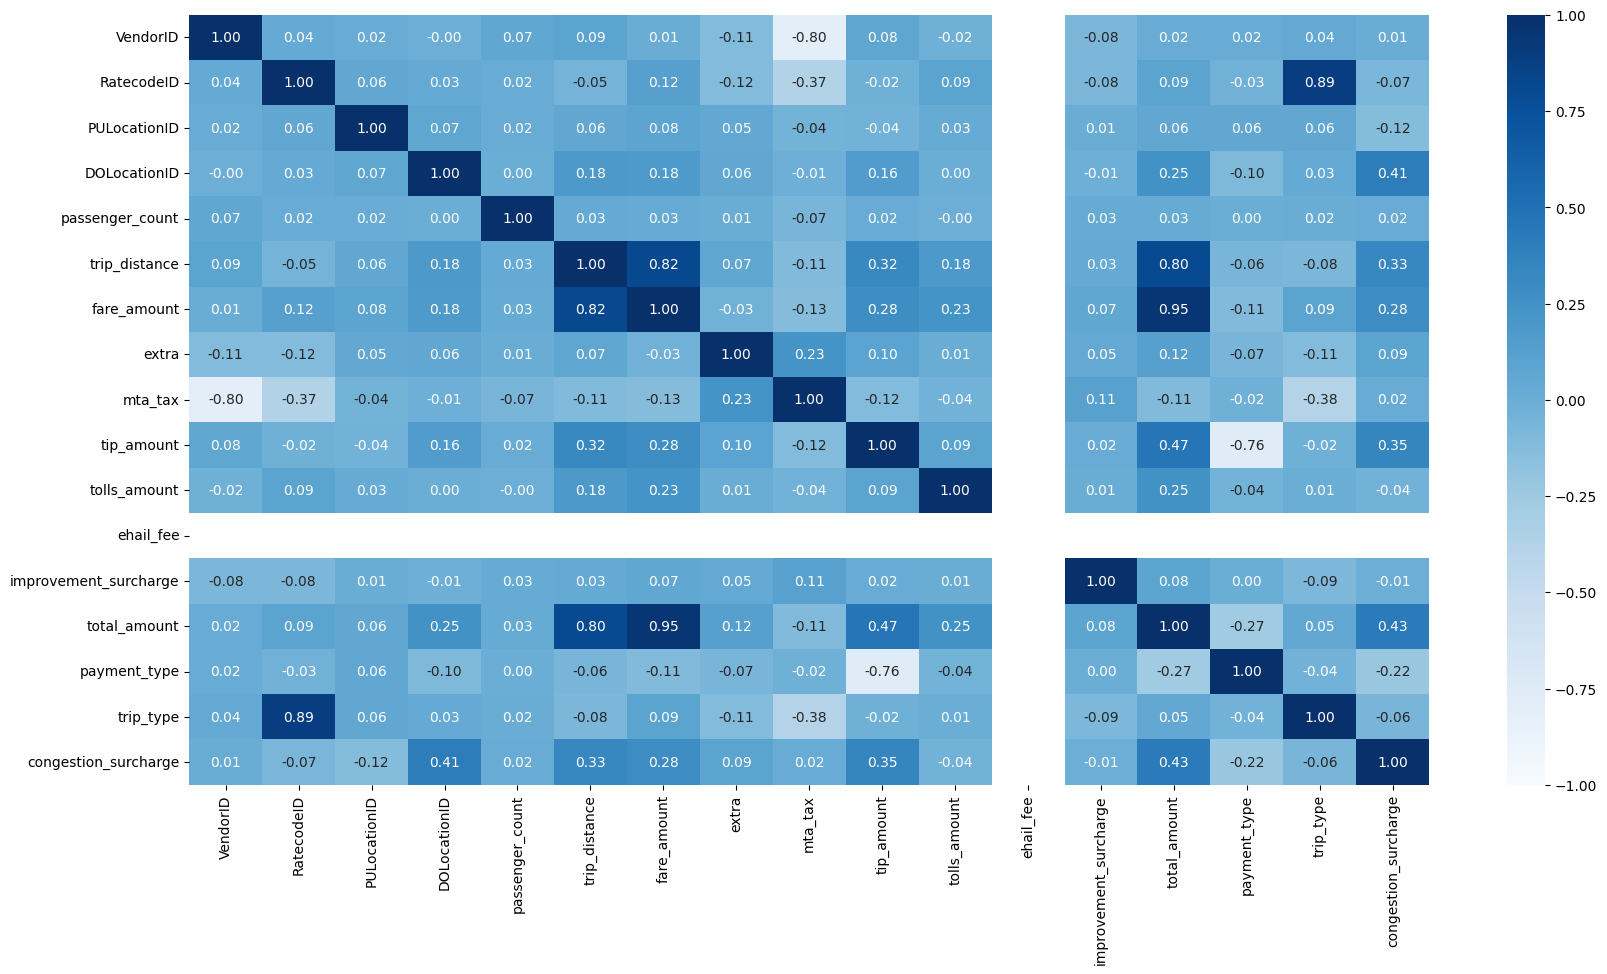

In [562]:
mask = np.triu(np.ones_like(df.corr(method='spearman', numeric_only=True), dtype=bool))

plt.figure(figsize=(20,10))
sns.heatmap(
    df.corr(method='spearman', numeric_only=True),
    # mask=mask,  
    annot=True,
    cmap="Blues",
    fmt=".2f",
    cbar=True,
    vmin=-1,
    vmax=1
)
plt.show()

Columns with strong positive correlation:
1. **total_amount** and **fare_amount**: Correlation of 0.95
2. **trip_distance** and **fare_amount**: Correlation of 0.82
3. **RatecodeID** and **trip_type**: Correlation of 0.89

Columns with strong negative correlation:
1. **payment_type** and **tip_amount**: Correlation of -0.76

---
### **3.1.8. Outliers**

In [563]:
numerical_columns = df.describe().columns
outlier_table = pd.DataFrame(columns=['Median', 'Lower Bound', 'Upper Bound', 'Number of Outliers', 'Percentage of Outliers (%)'])
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.5)
    Q3 = df[column].quantile(0.75)
    upper_bound = Q3 + 1.5 * (Q3 - Q1)
    lower_bound = Q1 - 1.5 * (Q3 - Q1)
    outlier_table.loc[column] = [
        df[column].median(),
        lower_bound,
        upper_bound,
        len(df[(df[column] < lower_bound) | (df[column] > upper_bound)]),
        len(df[(df[column] < lower_bound) | (df[column] > upper_bound)]) / len(df) * 100
    ]
display(outlier_table.round(2))

,Median,Lower Bound,Upper Bound,Number of Outliers,Percentage of Outliers (%)
VendorID,2.00,2.00,2.00,9343.0,13.70
RatecodeID,1.00,1.00,1.00,1784.0,2.62
PULocationID,75.00,-8.50,211.50,6133.0,8.99
DOLocationID,138.00,-143.50,436.50,0.0,0.00
passenger_count,1.00,1.00,1.00,9588.0,14.06
trip_distance,1.85,-2.04,6.36,5774.0,8.46
fare_amount,13.50,-6.45,35.55,4339.0,6.36
extra,0.00,-1.50,2.50,3586.0,5.26
mta_tax,0.50,0.50,0.50,15034.0,22.04
tip_amount,1.60,-5.00,8.32,2045.0,3.00


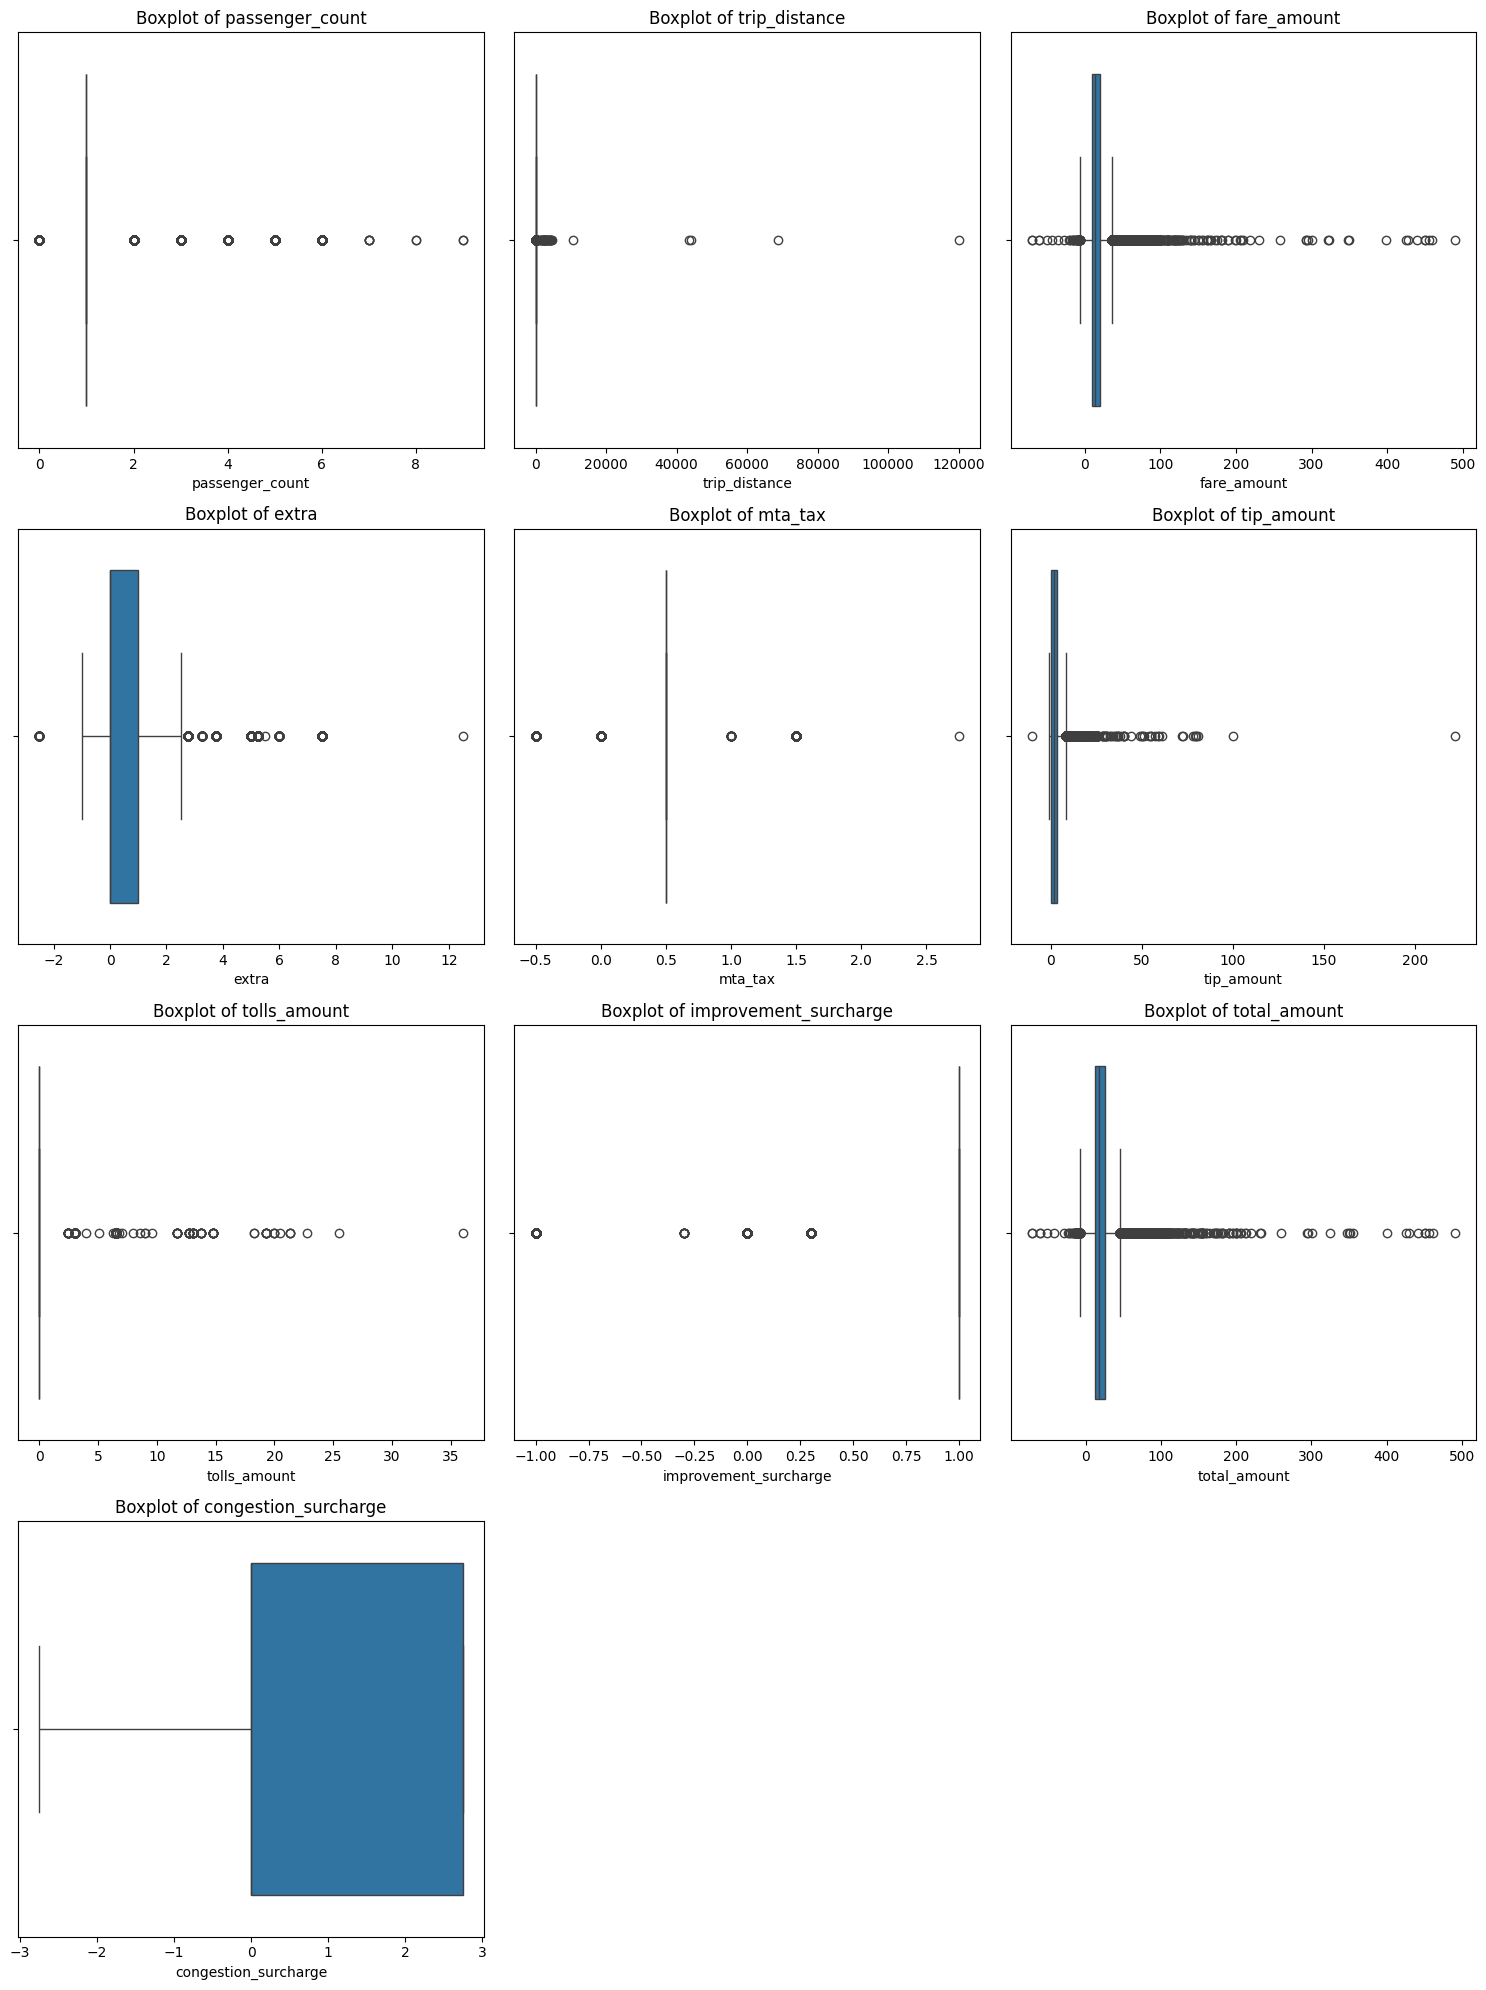

In [564]:
numerical_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                     'improvement_surcharge', 'total_amount', 'congestion_surcharge']

ncols = 3  
nrows = (len(numerical_columns) // ncols) + (len(numerical_columns) % ncols > 0)

plt.figure(figsize=(15, 5 * nrows))

for i in range(len(numerical_columns)): 
    plt.subplot(nrows, ncols, i + 1) 
    sns.boxplot(data=df, x=numerical_columns[i])
    plt.title(f'Boxplot of {numerical_columns[i]}')

plt.tight_layout()
plt.show()


> All columns have outliers except for the DOLocationID and congestion_surcharge columns.

---
### **3.1.9. Supporting Data**

The dataset represents taxi zones in NYC, including LocationID, zone name, and borough. The dataset can be accessed [here](https://catalog.data.gov/dataset/nyc-taxi-zones).

**Key Features:**

1. OBJECTID: Unique identifier for each row, no missing values or duplicates.
2. Shape_Leng: Represents the perimeter length of the geographic zones, all non-negative values.
3. the_geom: Geographic data in MULTIPOLYGON format, useful for spatial mapping.
4. Shape_Area: The area of the geographic zones, all non-negative values.
5. zone: Names of the taxi zones, 260 unique values indicating a few repetitions.
6. LocationID: Numeric identifier for each zone, matches with zone values (260 unique).
7. borough: Represents one of six boroughs: EWR (Newark Airport), Queens, Bronx, Manhattan, Staten Island, and Brooklyn.

In [565]:
pd.reset_option('display.max_colwidth')
zone = pd.read_csv("taxi_zones.csv")
zone.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island


In [566]:
zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   the_geom    263 non-null    object 
 3   Shape_Area  263 non-null    float64
 4   zone        263 non-null    object 
 5   LocationID  263 non-null    int64  
 6   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 14.5+ KB


In [567]:
location_info = zone[zone['borough'] == "Manhattan"]
location_info[['LocationID', 'zone', 'borough']].head()

,LocationID,zone,borough
3,4,Alphabet City,Manhattan
9,24,Bloomingdale,Manhattan
12,12,Battery Park,Manhattan
13,13,Battery Park City,Manhattan
40,41,Central Harlem,Manhattan


In [568]:
# pd.set_option('display.max_colwidth', None)
result = zone.groupby('borough').agg({
    'LocationID': lambda x: list(x.unique()),
    'zone': lambda x: list(x.unique())
}).reset_index()

result


,borough,LocationID,zone
0,Bronx,"[3, 18, 20, 31, 32, 46, 47, 51, 58, 59, 60, 69...","[Allerton/Pelham Gardens, Bedford Park, Belmon..."
1,Brooklyn,"[11, 25, 14, 22, 17, 21, 26, 33, 29, 34, 35, 3...","[Bath Beach, Boerum Hill, Bay Ridge, Bensonhur..."
2,EWR,[1],[Newark Airport]
3,Manhattan,"[4, 24, 12, 13, 41, 45, 42, 43, 48, 50, 68, 79...","[Alphabet City, Bloomingdale, Battery Park, Ba..."
4,Queens,"[2, 7, 8, 9, 10, 15, 16, 19, 27, 28, 30, 38, 5...","[Jamaica Bay, Astoria, Astoria Park, Auburndal..."
5,Staten Island,"[5, 6, 23, 44, 84, 99, 109, 110, 115, 118, 156...","[Arden Heights, Arrochar/Fort Wadsworth, Bloom..."


> Display the zones within the Manhattan 96th Street area that will incur a congestion surcharge. Not all zones in the Manhattan borough are considered congested zones, only these specific zones are included:

In [569]:
target_zones = [
    "Alphabet City", "Battery Park", "Battery Park City", "Chinatown", "Clinton East", 
    "Clinton West", "East Chelsea", "East Village", "Financial District North", 
    "Financial District South", "Flatiron", "Garment District", 
    "Governor's Island/Ellis Island/Liberty Island", "Gramercy", 
    "Greenwich Village North", "Greenwich Village South", "Hudson Sq", 
    "Kips Bay", "Lenox Hill East", "Lenox Hill West", "Lincoln Square East", 
    "Lincoln Square West", "Little Italy/NoLiTa", "Lower East Side", 
    "Meatpacking/West Village West", "Midtown Center", "Midtown East", "Midtown North", 
    "Midtown South", "Murray Hill", "Penn Station/Madison Sq West", "Seaport", 
    "SoHo", "Stuy Town/Peter Cooper Village", "Sutton Place/Turtle Bay North", 
    "Times Sq/Theatre District", "TriBeCa/Civic Center", "Two Bridges/Seward Park", 
    "UN/Turtle Bay South", "Union Sq", "Upper East Side South", "West Chelsea/Hudson Yards", 
    "West Village", "World Trade Center", "Yorkville East"
]

location_info = zone[zone['zone'].isin(target_zones)]

location_info[['LocationID','zone']].drop_duplicates()

,LocationID,zone
3,4,Alphabet City
12,12,Battery Park
13,13,Battery Park City
41,45,Chinatown
47,48,Clinton East
49,50,Clinton West
68,68,East Chelsea
73,79,East Village
83,87,Financial District North
87,88,Financial District South


> lokasi ID yang termasuk daerah 96th street manhattan = 4, 12, 13, 45, 48, 50, 68, 79, 87, 88, 90, 125, 100, 103, 107, 113, 114, 140, 137, 141, 142, 143, 146, 148, 158, 161, 162, 163, 164, 170, 186, 209, 211, 224, 229, 230, 231, 232, 233, 234, 237, 246, 249, 261, 262


In [570]:
location_info = zone[zone['LocationID'] == 263]
location_info[['LocationID', 'zone', 'borough']]

,LocationID,zone,borough
244,263,Yorkville West,Manhattan


In [571]:
pd.set_option('display.max_colwidth', 30)
listItem = []
for col in zone.columns :
    listItem.append( [col, zone[col].nunique(), zone[col].unique()])

datasupport = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
datasupport

,Column Name,Number of Unique,Unique Sample
0,OBJECTID,263,"[1, 2, 3, 4, 5, 6, 7, 8, 9..."
1,Shape_Leng,263,"[0.116357453189, 0.4334696..."
2,the_geom,263,[MULTIPOLYGON (((-74.18445...
3,Shape_Area,263,"[0.0007823067885, 0.004866..."
4,zone,260,"[Newark Airport, Jamaica B..."
5,LocationID,260,"[1, 2, 3, 4, 5, 6, 7, 8, 9..."
6,borough,6,"[EWR, Queens, Bronx, Manha..."


In [572]:
zone.isna().sum()

OBJECTID      0
Shape_Leng    0
the_geom      0
Shape_Area    0
zone          0
LocationID    0
borough       0
dtype: int64

> No missing values were found in this dataset

In [573]:
zone.duplicated().sum()

0

> No duplicate data were found in this dataset

**Summary of Supporting Data**

In [574]:
pd.DataFrame({
    'column': zone.columns.values,
    'data_type': zone.dtypes.values,
    'null_value(%)': zone.isna().mean().values * 100,
    'negative_value(%)': [len(zone[col][zone[col] < 0]) / len(zone) * 100 if col in zone.select_dtypes(include=[np.number]).columns else 0 for col in zone.columns],
    '0_value(%)': [len(zone[col][zone[col] == 0]) / len(zone) * 100 if col in zone.select_dtypes(include=[np.number]).columns else 0 for col in zone.columns],
    'duplicate' : zone.duplicated().sum(),
    'n_unique': zone.nunique().values,
    'sample_unique': [zone[col].unique() for col in zone.columns]}
).round(3)

,column,data_type,null_value(%),negative_value(%),0_value(%),duplicate,n_unique,sample_unique
0,OBJECTID,int64,0.0,0.0,0.0,0,263,"[1, 2, 3, 4, 5, 6, 7, 8, 9..."
1,Shape_Leng,float64,0.0,0.0,0.0,0,263,"[0.116357453189, 0.4334696..."
2,the_geom,object,0.0,0.0,0.0,0,263,[MULTIPOLYGON (((-74.18445...
3,Shape_Area,float64,0.0,0.0,0.0,0,263,"[0.0007823067885, 0.004866..."
4,zone,object,0.0,0.0,0.0,0,260,"[Newark Airport, Jamaica B..."
5,LocationID,int64,0.0,0.0,0.0,0,260,"[1, 2, 3, 4, 5, 6, 7, 8, 9..."
6,borough,object,0.0,0.0,0.0,0,6,"[EWR, Queens, Bronx, Manha..."


**Summary of Supporting Data:**  
1. Consists of 7 columns and 263 rows.  
2. No missing values, negative values, or duplicates.  

The data is ready for further analysis.

---
## **3.2.  Data Preprocessing & Data Cleaning**

### **3.2.1. Drop Unnecessary Column**

In [575]:
df.drop(columns=['ehail_fee'], inplace=True)

> The column "ehail_fee" contains missing (NaN) values for all entries in the dataset, indicating that no transactions used the e-hail application (such as Uber or Lyft) during the recorded time period. Therefore, this column does not provide relevant information for further analysis and can be removed.

In [576]:
display(df.columns, len(df.columns))

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

19

> The "ehail_fee" column has been removed, and currently, there are 19 remaining columns.

---


### **3.2.2. Missing Values Handling**

kolom yang terdapat missing values yaitu `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge`. 

In [577]:
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

> kolom yang memiliki jumlah missing value 4324 dan berada pada baris yang sama

In [578]:
pd.reset_option('display.max_rows')
df[df[['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge']].isna().all(axis=1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [579]:
df['store_and_fwd_flag'].mode()[0]

'N'

In [580]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])
print(df['store_and_fwd_flag'].isnull().sum())

0


Missing values in the store_and_fwd_flag column will be filled with the most frequent value, which is 'N'. The value 'N' in this context indicates that drivers most often do not store trip data in the taxi's memory before sending it to the server.

---

In [581]:
df['RatecodeID'].mode()[0]

1.0

In [582]:
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
print(df['RatecodeID'].isnull().sum())

0


Kolom `RatecodeID` akan diisi dengan modus yang bernilai `'1.0'` karena data ini bersifat kategorikal, meskipun saat ini bertipe data float. Hal tersebut hanyalah representasi teknis, dan nilai-nilai di dalam kolom ini (seperti 1.0, 2.0, 3.0) sebenarnya merepresentasikan kategori tertentu yang tidak memiliki urutan atau nilai numerik yang berarti.

---



In [583]:
df['passenger_count'].median()

1.0

In [584]:
df['passenger_count'] = df.apply(lambda row: df['passenger_count'].median() 
                                 if pd.isna(row['passenger_count']) 
                                 and row['trip_distance'] >= 0 
                                 else row['passenger_count'], axis=1)

print(df['passenger_count'].isnull().sum())


0


> jika perjalanan benar-benar terjadi baik taksi telah berjalan atau belum (trip_distance >= 0 ), jumlah penumpang tidak mungkin Null (tidak ada), maka di asumsikan jumlah penumpangnya adalah nilai median dari data penumpang yang ada.

---

In [585]:
df['payment_type'].mode()

0    1.0
Name: payment_type, dtype: float64

In [586]:
df['payment_type'].value_counts()

payment_type
1.0    40686
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

> seharusnya masih ada payment_type `6.0` yaitu > voided trip (perjalanan yang dibatalkan)

In [587]:
df[(df['payment_type'].isna()) & 
   ((df['lpep_pickup_datetime'] == df['lpep_dropoff_datetime']) | (df['trip_distance'] == 0))]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63920,2,2023-01-01 01:11:00,2023-01-01 01:39:00,N,1.0,37,90,1.0,0.0,34.43,0.0,0.0,8.95,6.55,1.0,53.68,NaN,NaN,NaN
63921,2,2023-01-01 01:58:00,2023-01-01 02:24:00,N,1.0,158,236,1.0,0.0,44.06,0.0,0.0,0.00,0.00,1.0,47.81,NaN,NaN,NaN
63973,2,2023-01-01 05:20:00,2023-01-01 05:43:00,N,1.0,198,48,1.0,0.0,35.30,0.0,0.0,1.00,6.55,1.0,46.60,NaN,NaN,NaN
63985,1,2023-01-01 10:28:58,2023-01-01 10:42:00,N,1.0,42,233,1.0,0.0,27.96,0.0,0.5,0.00,0.00,1.0,31.96,NaN,NaN,NaN
64074,2,2023-01-02 03:57:00,2023-01-02 04:23:00,N,1.0,61,68,1.0,0.0,36.01,0.0,0.0,4.00,0.00,1.0,43.76,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68014,2,2023-01-30 13:29:00,2023-01-30 14:15:00,N,1.0,14,75,1.0,0.0,51.12,0.0,0.0,1.17,6.55,1.0,62.59,NaN,NaN,NaN
68112,2,2023-01-31 08:36:00,2023-01-31 08:51:00,N,1.0,41,75,1.0,0.0,15.56,0.0,0.0,0.00,0.00,1.0,16.56,NaN,NaN,NaN
68136,1,2023-01-31 11:10:20,2023-01-31 11:45:20,N,1.0,42,132,1.0,0.0,70.50,0.0,0.5,10.80,0.00,1.0,84.80,NaN,NaN,NaN
68161,2,2023-01-31 13:53:00,2023-01-31 14:17:00,N,1.0,7,145,1.0,0.0,23.43,0.0,0.0,4.89,0.00,1.0,29.32,NaN,NaN,NaN


In [588]:
df['payment_type'] = np.where(
    (df['payment_type'].isna()) & 
    ((df['lpep_pickup_datetime'] == df['lpep_dropoff_datetime']) | (df['trip_distance'] == 0)),
    6.0, 
    df['payment_type']
)


> `payment_type` with the condition that the pickup time is the same as the dropoff time or the trip distance is 0 (the taxi did not move) will be filled with 6, which represents a voided trip

In [589]:
df[df['payment_type'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,N,1.0,7,17,1.0,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,N,1.0,37,37,1.0,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,N,1.0,80,7,1.0,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,N,1.0,169,42,1.0,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,N,1.0,42,262,1.0,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [590]:
df[(df['payment_type'].isna()) & (df['tip_amount'] > 0.0)]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,N,1.0,7,17,1.0,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,N,1.0,37,37,1.0,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,N,1.0,80,7,1.0,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,N,1.0,42,262,1.0,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN
63892,2,2023-01-01 00:30:00,2023-01-01 01:01:00,N,1.0,7,61,1.0,15.43,55.53,0.0,0.0,16.96,0.0,1.0,73.49,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,N,1.0,42,236,1.0,2.26,14.62,0.0,0.0,3.31,0.0,1.0,21.68,NaN,NaN,NaN
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,1.0,75,186,1.0,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [591]:
df['payment_type'] = np.where(
    (df['payment_type'].isna()) & (df['tip_amount'] > 0.0), 1.0, 
    np.where(df['payment_type'].isna(), 5.0, df['payment_type'])
)


> Since `payment_type` is closely related to `tip_amount`, missing values in the `payment_type` column are filled based on the `tip_amount`. If `tip_amount` is greater than 0, `payment_type` is set to 1.0 (indicating a credit card payment). If `tip_amount` is 0 or missing, `payment_type` is set to 5.0 (indicating cash). Existing values in the `payment_type` column remain unchanged.

In [592]:
df[(df['tip_amount'] > 0) & (df['payment_type'] == 2)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
38207,1,2023-01-19 21:12:51,2023-01-19 21:25:07,N,1.0,74,237,1.0,2.7,15.6,3.75,1.5,5.0,0.0,1.0,25.85,2.0,1.0,2.75


In [593]:
df.loc[(df['tip_amount'] > 0) & (df['payment_type'] == 2), 'payment_type'] = 1

> There is one row where the payment was actually made by credit card, as evidenced by the non-zero value in `tip_amount`, but it was incorrectly recorded as cash in the `payment_type` column. It will be updated to reflect "credit card" as the payment type.

In [594]:
df['payment_type'].isna().sum()

0

> If `tip_amount` has a value, it is assumed that the payment was made using a credit card. Conversely, if `tip_amount` is 0.0, the payment is considered to be made with cash

---

In [595]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     66427
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

In [596]:
df['RatecodeID'] = np.where(df['RatecodeID'] == 99.0, df['RatecodeID'].mode()[0], df['RatecodeID'])

> Replacing the **RatecodeID** value of **99**, considered an outlier, with the mode of **RatecodeID**

In [597]:
pd.crosstab(df['trip_type'], df['RatecodeID'])

RatecodeID,1.0,2.0,3.0,4.0,5.0
trip_type,,,,,
1.0,62097,158,30,55,136
2.0,6,0,0,2,1393


> Based on the crosstab and mode analysis, it can be concluded that:  
1. Trips with codes 1.0, 2.0, 3.0, and 4.0 most frequently use taxis via street-hail (1.0)
2. Trips with code 5.0 most frequently use taxis via dispatch (2.0)

In [598]:
from scipy import stats
contingency_table = pd.crosstab(df['trip_type'], df['RatecodeID'])

chi2, pvalue, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Value: {pvalue}")
if pvalue < 0.05:
    print("There is a significant dependency between trip_type and RatecodeID")
else:
    print("There is no significant dependency between trip_type and RatecodeID")


Chi-Square Value: 0.0
There is a significant dependency between trip_type and RatecodeID


> Using Chi-square to test the correlation between `RatecodeID` and `trip_type`, as both are categorical data. Although numerical, these values only represent categories without any quantitative meaning

In [599]:
df['trip_type'] = np.where(
    (df['trip_type'].isna()) & (df['RatecodeID'] == 5), 
    2, 
    np.where(
        (df['trip_type'].isna()) & (df['RatecodeID'].isin([1, 2, 3, 4])), 
        1, 
        df['trip_type']
    )
)

> Filling missing values in the `trip_type` column based on the logic of `RatecodeID`

In [600]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge     4324
dtype: int64

In [601]:
df['congestion_surcharge'].mode()

0    0.0
Name: congestion_surcharge, dtype: float64

In [602]:
mode_paid_surcharge = df[df['congestion_surcharge'] > 0]['congestion_surcharge'].mode()[0]


In [603]:
median_overall_surcharge = df['congestion_surcharge'].median()

In [604]:
pd.crosstab(df['RatecodeID'], df['congestion_surcharge'])

congestion_surcharge,-2.75,0.00,2.50,2.75
RatecodeID,,,,
1.0,3,45345,16,16749
2.0,0,154,0,4
3.0,0,30,0,0
4.0,0,57,0,0
5.0,0,1410,0,119


In [605]:
manhattan_zones = [4, 12, 13, 45, 48, 50, 68, 79, 87, 88, 90, 125, 100, 103, 107, 113, 114, 140, 
                   137, 141, 142, 143, 146, 148, 158, 161, 162, 163, 164, 170, 186, 209, 211, 224, 
                   229, 230, 231, 232, 233, 234, 237, 246, 249, 261, 262]

mode_paid_surcharge = df[df['congestion_surcharge'] > 0]['congestion_surcharge'].mode()[0]

median_overall_surcharge = df['congestion_surcharge'].median()

df['congestion_surcharge'] = df.apply(
    lambda row: mode_paid_surcharge if (row['PULocationID'] in manhattan_zones or row['DOLocationID'] in manhattan_zones) 
    else median_overall_surcharge if pd.isnull(row['congestion_surcharge']) 
    else row['congestion_surcharge'], 
    axis=1
)

> - If the trip starts or ends in a Manhattan zone, missing values are filled with the mode of paid surcharges, which is 2.75.  
> - If the trip is not related to Manhattan, missing values are filled with the overall median of the congestion surcharge.  
> - If the original value is not missing, it remains unchanged. 

In [606]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [607]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100
}).round(3)

,feature,data_type,null_value(%)
0,VendorID,int64,0.0
1,lpep_pickup_datetime,object,0.0
2,lpep_dropoff_datetime,object,0.0
3,store_and_fwd_flag,object,0.0
4,RatecodeID,float64,0.0
5,PULocationID,int64,0.0
6,DOLocationID,int64,0.0
7,passenger_count,float64,0.0
8,trip_distance,float64,0.0
9,fare_amount,float64,0.0


> All missing values have been handled

---
### **3.2.3. Zero Values Handling**

In [608]:
zero_counts = (df == 0).sum()
zero_percentage = (df == 0).mean() * 100
zero_value_df = pd.DataFrame({
    'data_type': df.dtypes,
    '0_value_count': zero_counts,
    '0_value_percentage': zero_percentage
}).round(3)
zero_value_df = zero_value_df.reset_index()
zero_value_df.rename(columns={'index' : 'column'})

,column,data_type,0_value_count,0_value_percentage
0,VendorID,int64,0,0.000
1,lpep_pickup_datetime,object,0,0.000
2,lpep_dropoff_datetime,object,0,0.000
3,store_and_fwd_flag,object,0,0.000
4,RatecodeID,float64,0,0.000
5,PULocationID,int64,0,0.000
6,DOLocationID,int64,0,0.000
7,passenger_count,float64,336,0.493
8,trip_distance,float64,3350,4.911
9,fare_amount,float64,83,0.122


> Some columns that have a value of 0 and need to be handled are:

1. **trip_distance**: The distance for each taxi trip will always be recorded, except in the case of cancellations. Therefore, if the value is 0, it will be considered as an imputation error and will be dropped.
   
2. **fare_amount**: For every trip, even when the meter starts before the taxi moves, an initial charge of $3.00 is applied. Therefore, if the value is 0, it will be considered as an imputation error and will be dropped.

3. **total_amount**: This is calculated by summing the values from the **fare_amount**, **extra**, **mta_tax**, **tip_amount**, **tolls_amount**, **improvement_surcharge**, and **congestion_surcharge** columns. However, if all these columns are 0, the record will be removed.

In [609]:
df[(df['lpep_pickup_datetime'] == df['lpep_dropoff_datetime']) & (df['total_amount'] == 0)].head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2793,1,2023-01-03 03:50:19,2023-01-03 03:50:19,Y,5.0,129,264,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
6550,2,2023-01-04 18:06:19,2023-01-04 18:06:19,N,1.0,193,264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0


In [610]:
df = df[~((df['lpep_pickup_datetime'] == df['lpep_dropoff_datetime']) & (df['total_amount'] == 0))]

> Rows where the pickup and dropoff times are identical indicate that no trip occurred, while a total amount of 0 signifies that no fare was charged. This data is considered a trip cancellation and will be removed

In [611]:
df[df['passenger_count'] == 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.0,20.0,0.00,0.0,0.0,0.0,1.0,21.00,1.0,2.0,0.00
254,1,2023-01-01 04:21:35,2023-01-01 04:30:00,N,1.0,129,129,0.0,1.3,8.0,0.50,1.5,2.8,4.0,1.0,16.80,1.0,1.0,0.00
446,1,2023-01-01 11:42:13,2023-01-01 11:49:21,N,1.0,260,260,0.0,1.2,8.6,0.00,1.5,2.0,0.0,1.0,12.10,1.0,1.0,0.00
486,1,2023-01-01 12:11:05,2023-01-01 12:20:45,N,1.0,42,127,0.0,3.4,16.3,0.00,1.5,1.0,0.0,1.0,18.80,1.0,1.0,0.00
487,1,2023-01-01 12:56:11,2023-01-01 13:01:06,N,1.0,75,236,0.0,1.2,7.2,2.75,1.5,3.4,0.0,1.0,14.85,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63239,1,2023-01-31 18:27:02,2023-01-31 18:27:08,N,1.0,145,145,0.0,0.0,3.0,2.50,1.5,0.0,0.0,1.0,7.00,2.0,1.0,0.00
63247,1,2023-01-31 18:01:21,2023-01-31 18:09:22,N,1.0,236,236,0.0,1.0,9.3,5.25,1.5,3.2,0.0,1.0,19.25,1.0,1.0,2.75
63288,1,2023-01-31 18:07:39,2023-01-31 18:07:55,N,1.0,260,260,0.0,0.1,3.0,2.50,1.5,0.0,0.0,1.0,7.00,2.0,1.0,0.00
63420,1,2023-01-31 18:32:09,2023-01-31 18:32:33,N,1.0,145,145,0.0,0.0,3.0,2.50,1.5,0.0,0.0,1.0,7.00,3.0,1.0,0.00


In [612]:
df['passenger_count'] = df['passenger_count'].replace(0, 1)

> Each order must have at least one passenger, so any values that are still 0 will be replaced with 1

In [613]:
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]
df = df[df['total_amount']>0]

The fare_amount, trip_distance, and total_amount columns contain values of 0 that cannot be explained or predicted (likely due to input errors). Therefore, rows with these values will be removed to ensure the quality and accuracy of the data analysis

In [614]:
zero_counts = (df == 0).sum()
zero_percentage = (df == 0).mean() * 100
zero_value_df = pd.DataFrame({
    'data_type': df.dtypes,
    '0_value_count': zero_counts,
    '0_value_percentage': zero_percentage
}).round(3)
zero_value_df = zero_value_df.reset_index()
zero_value_df.rename(columns={'index' : 'column'})

,column,data_type,0_value_count,0_value_percentage
0,VendorID,int64,0,0.000
1,lpep_pickup_datetime,object,0,0.000
2,lpep_dropoff_datetime,object,0,0.000
3,store_and_fwd_flag,object,0,0.000
4,RatecodeID,float64,0,0.000
5,PULocationID,int64,0,0.000
6,DOLocationID,int64,0,0.000
7,passenger_count,float64,0,0.000
8,trip_distance,float64,0,0.000
9,fare_amount,float64,0,0.000


> Only columns with valid zero values are retained, while columns with zero values due to missing data have been removed

---
### **3.2.4. Type Casting**

In [615]:
# Mengubah tipe data dari kolom yang berisi informasi waktu (object -> datetime)
import datetime as dt
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

> Convert the data type of the lpep_pickup_datetime and lpep_dropoff_datetime columns to datetime in order to facilitate time analysis, such as calculating trip duration, filtering data by date/time, and performing daily/weekly trend analysis.

In [616]:
# Mengubah tipe data kolom passenger_count (float -> int)
df['passenger_count'] = df['passenger_count'].astype(int)

> Convert the data type of the passenger_count column to int because the number of passengers should be represented as an integer.

In [617]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75


In [618]:
# Mengubah tipe data kolom yang termasuk dalam bentuk kategori (object/float -> category)
df['VendorID'] = df['VendorID'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['RatecodeID'] = df['RatecodeID'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['trip_type'] = df['trip_type'].astype('category')

> The category format is more efficient in storing data with fixed categories and more intuitive for analysis.

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64735 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64735 non-null  category      
 1   lpep_pickup_datetime   64735 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  64735 non-null  datetime64[ns]
 3   store_and_fwd_flag     64735 non-null  category      
 4   RatecodeID             64735 non-null  category      
 5   PULocationID           64735 non-null  int64         
 6   DOLocationID           64735 non-null  int64         
 7   passenger_count        64735 non-null  int32         
 8   trip_distance          64735 non-null  float64       
 9   fare_amount            64735 non-null  float64       
 10  extra                  64735 non-null  float64       
 11  mta_tax                64735 non-null  float64       
 12  tip_amount             64735 non-null  float64       
 13  tolls_

> Columns that require type casting have been handled

---
### **3.2.5. UTC Format**

In [620]:
# Memeriksa apakah kolom datetime memiliki zona waktu (tzinfo) dan apakah zona waktunya UTC
lpep_pickup_date_utc = df['lpep_pickup_datetime'].apply(lambda x: x.tzinfo is None)
lpep_dropoff_date_utc = df['lpep_dropoff_datetime'].apply(lambda x: x.tzinfo is None)

lpep_pickup_date_utc, lpep_dropoff_date_utc

(0        True
 1        True
 3        True
 4        True
 5        True
          ... 
 68206    True
 68207    True
 68208    True
 68209    True
 68210    True
 Name: lpep_pickup_datetime, Length: 64735, dtype: bool,
 0        True
 1        True
 3        True
 4        True
 5        True
          ... 
 68206    True
 68207    True
 68208    True
 68209    True
 68210    True
 Name: lpep_dropoff_datetime, Length: 64735, dtype: bool)

> Based on the check above, it is found that the datetime does not have a reference to a specific timezone (UTC)

> During January 2023, New York used Eastern Standard Time (EST), which is UTC-5. Therefore, the time format in the `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns will be adjusted to UTC-5 (5 hours behind)

In [621]:
# Membuat kolom baru untuk datetime yang dikonversi ke UTC-5 tanpa zona waktu
df['lpep_pickup_datetime_utc5'] = df['lpep_pickup_datetime'].dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+5').dt.tz_localize(None)
df['lpep_dropoff_datetime_utc5'] = df['lpep_dropoff_datetime'].dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+5').dt.tz_localize(None)

df[['lpep_pickup_datetime', 'lpep_pickup_datetime_utc5', 'lpep_dropoff_datetime', 'lpep_dropoff_datetime_utc5']]


,lpep_pickup_datetime,lpep_pickup_datetime_utc5,lpep_dropoff_datetime,lpep_dropoff_datetime_utc5
0,2023-01-01 00:26:10,2022-12-31 19:26:10,2023-01-01 00:37:11,2022-12-31 19:37:11
1,2023-01-01 00:51:03,2022-12-31 19:51:03,2023-01-01 00:57:49,2022-12-31 19:57:49
3,2023-01-01 00:13:14,2022-12-31 19:13:14,2023-01-01 00:19:03,2022-12-31 19:19:03
4,2023-01-01 00:33:04,2022-12-31 19:33:04,2023-01-01 00:39:02,2022-12-31 19:39:02
5,2023-01-01 00:53:31,2022-12-31 19:53:31,2023-01-01 01:11:04,2022-12-31 20:11:04
...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 17:29:00,2023-01-31 22:42:00,2023-01-31 17:42:00
68207,2023-01-31 22:40:00,2023-01-31 17:40:00,2023-01-31 22:48:00,2023-01-31 17:48:00
68208,2023-01-31 23:46:00,2023-01-31 18:46:00,2023-02-01 00:02:00,2023-01-31 19:02:00
68209,2023-01-31 23:01:00,2023-01-31 18:01:00,2023-01-31 23:19:00,2023-01-31 18:19:00


> After converting the time format from UTC to UTC-5, in line with the time in New York during January 2023, the pickup and drop-off times became **more logical and aligned with expectations**

In [622]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_pickup_datetime_utc5,lpep_dropoff_datetime_utc5
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,2022-12-31 19:26:10,2022-12-31 19:37:11
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,2022-12-31 19:51:03,2022-12-31 19:57:49
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,2022-12-31 19:13:14,2022-12-31 19:19:03
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,2022-12-31 19:33:04,2022-12-31 19:39:02
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,2022-12-31 19:53:31,2022-12-31 20:11:04


> Rearranging the dataframe to match the desired column order

In [623]:
df = df[['VendorID', 'PULocationID', 'DOLocationID',
         'lpep_pickup_datetime_utc5', 'lpep_dropoff_datetime_utc5', 
         'passenger_count', 'trip_distance', 'RatecodeID', 'fare_amount', 
         'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
         'improvement_surcharge', 'total_amount', 'payment_type', 
         'trip_type', 'congestion_surcharge', 'store_and_fwd_flag']]

df.head()


,VendorID,PULocationID,DOLocationID,lpep_pickup_datetime_utc5,lpep_dropoff_datetime_utc5,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,store_and_fwd_flag
0,2,166,143,2022-12-31 19:26:10,2022-12-31 19:37:11,1,2.58,1.0,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,N
1,2,24,43,2022-12-31 19:51:03,2022-12-31 19:57:49,1,1.81,1.0,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,N
3,1,41,238,2022-12-31 19:13:14,2022-12-31 19:19:03,1,1.30,1.0,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,N
4,1,41,74,2022-12-31 19:33:04,2022-12-31 19:39:02,1,1.10,1.0,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,N
5,2,41,262,2022-12-31 19:53:31,2022-12-31 20:11:04,1,2.78,1.0,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,N


### **3.2.6. Outliers Handling**

> pickup_datetime & dropoff_datetime

In [624]:
df['lpep_pickup_datetime_utc5'].dt.year.value_counts()

lpep_pickup_datetime_utc5
2023    64398
2022      336
2009        1
Name: count, dtype: int64

In [625]:
df['lpep_dropoff_datetime_utc5'].dt.year.value_counts()

lpep_dropoff_datetime_utc5
2023    64412
2022      322
2009        1
Name: count, dtype: int64

> The analysis of this dataset is focused only on the year 2023, so the years 2022 and 2009 will be removed.

In [626]:
# Cek bulan berdasarkan jumlahnya
df['lpep_pickup_datetime_utc5'].dt.month.value_counts()

lpep_pickup_datetime_utc5
1     64399
12      336
Name: count, dtype: int64

In [627]:
# Cek bulan berdasarkan jumlahnya
df['lpep_dropoff_datetime_utc5'].dt.month.value_counts()

lpep_dropoff_datetime_utc5
1     64407
12      322
2         6
Name: count, dtype: int64

> The analysis of this dataset is focused only on January 2023, so February and December will be removed.

In [628]:
df['lpep_pickup_datetime_utc5'].dt.day.value_counts().sort_index()

lpep_pickup_datetime_utc5
1     1111
2     1497
3     1990
4     2265
5     2302
6     2520
7     2076
8     1440
9     2052
10    2091
11    2342
12    2381
13    2528
14    2043
15    1583
16    1464
17    2139
18    2219
19    2536
20    2465
21    2105
22    1557
23    2244
24    2266
25    2564
26    2540
27    2433
28    1966
29    1424
30    2088
31    2504
Name: count, dtype: int64

>There are no outliers in the dates in the `lpep_pickup_datetime` column

In [629]:
df['lpep_dropoff_datetime_utc5'].dt.day.value_counts().sort_index()

lpep_dropoff_datetime_utc5
1     1124
2     1496
3     1991
4     2269
5     2300
6     2516
7     2070
8     1450
9     2046
10    2096
11    2343
12    2379
13    2523
14    2047
15    1583
16    1468
17    2141
18    2216
19    2536
20    2456
21    2109
22    1561
23    2243
24    2261
25    2572
26    2532
27    2433
28    1968
29    1427
30    2090
31    2489
Name: count, dtype: int64

> There are no outliers in the dates in the `lpep_pickup_datetime` column

In [630]:
outliers_datetime = df[~((df['lpep_pickup_datetime_utc5'].dt.month == 1) & (df['lpep_dropoff_datetime_utc5'].dt.year == 2023))]

outlier_percentage = (outliers_datetime.shape[0] / df.shape[0]) * 100

print(f'Outlier Datetime (not January 2023): {outlier_percentage}%')

Outlier Datetime (not January 2023): 0.5205839190546072%


> Since the percentage of data considered outliers, specifically from the years 2022 and 2009, as well as the months of February and December, is relatively small, removing this data will not significantly affect the analysis

In [631]:
dfn = df[(df['lpep_pickup_datetime_utc5'].dt.year == 2023) & (df['lpep_pickup_datetime_utc5'].dt.month == 1)]


In [632]:
dfn.head()

,VendorID,PULocationID,DOLocationID,lpep_pickup_datetime_utc5,lpep_dropoff_datetime_utc5,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,store_and_fwd_flag
277,2,80,181,2023-01-01 00:01:20,2023-01-01 00:23:49,1,6.99,1.0,31.7,1.0,0.5,10.26,0.0,1.0,44.46,1.0,1.0,0.00,N
279,2,75,238,2023-01-01 00:40:32,2023-01-01 00:45:02,5,1.15,1.0,7.2,1.0,0.5,2.49,0.0,1.0,14.94,1.0,1.0,2.75,N
280,2,75,41,2023-01-01 00:10:55,2023-01-01 00:17:55,1,1.63,1.0,10.0,1.0,0.5,0.00,0.0,1.0,12.50,2.0,1.0,0.00,N
281,2,129,230,2023-01-01 00:25:07,2023-01-01 00:53:25,1,6.09,1.0,31.7,1.0,0.5,0.00,0.0,1.0,36.95,2.0,1.0,2.75,N
282,2,129,260,2023-01-01 00:13:15,2023-01-01 00:24:52,1,1.36,1.0,12.1,1.0,0.5,0.00,0.0,1.0,14.60,2.0,1.0,0.00,N


In [633]:
dfn.shape

(64398, 19)

### **3.2.7. Data Transformation**
-> Convert the values in the VendorID, store_and_fwd, RatecodeID, payment_type, and trip_type columns to more descriptive and easily understandable strings.

In [634]:
dfn['VendorID'] = dfn['VendorID'].replace({1: 'Creative Mobile Technologies, LLC.', 2: 'VeriFone Inc.'})
dfn['VendorID'].value_counts()

VendorID
VeriFone Inc.                         56643
Creative Mobile Technologies, LLC.     7755
Name: count, dtype: int64

In [635]:
dfn['store_and_fwd_flag'] = dfn['store_and_fwd_flag'].replace({
    'Y': 'Stored in Vehicle Memory Before Sending',
    'N': 'Sent in Real-Time'
})
dfn['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
Sent in Real-Time                          64154
Stored in Vehicle Memory Before Sending      244
Name: count, dtype: int64

In [636]:
dfn['RatecodeID'] = dfn['RatecodeID'].replace({
    1: 'Standard Fare',
    2: 'JFK (John F. Kennedy Airport)',
    3: 'Newark (Newark Airport)',
    4: 'Nassau or Westchester',
    5: 'Negotiated Fare',
    6: 'Group Ride'
})
dfn['RatecodeID'].value_counts()

RatecodeID
Standard Fare                    63265
Negotiated Fare                    931
JFK (John F. Kennedy Airport)      131
Nassau or Westchester               52
Newark (Newark Airport)             19
Name: count, dtype: int64

In [637]:
dfn['payment_type']=dfn['payment_type'].replace({1:'Credit Card', 2:'Cash', 3:'No Charge', 4:'Payment Dispute', 5:'Unknown', 6:'Voided Trip'})
dfn['payment_type'].value_counts()

payment_type
Credit Card        41944
Cash               21749
Unknown              433
No Charge            223
Payment Dispute       49
Name: count, dtype: int64

In [638]:
dfn['trip_type']=dfn['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
dfn['trip_type'].value_counts()

trip_type
Street-hail    63578
Dispatch         820
Name: count, dtype: int64

### **3.2.8. Adding Column**
- hour
- day_of_week
- duration
- speed

In [639]:
dfn.columns

Index(['VendorID', 'PULocationID', 'DOLocationID', 'lpep_pickup_datetime_utc5',
       'lpep_dropoff_datetime_utc5', 'passenger_count', 'trip_distance',
       'RatecodeID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type',
       'trip_type', 'congestion_surcharge', 'store_and_fwd_flag'],
      dtype='object')

> durasi trip dalam menit

In [640]:
dfn['duration'] = (dfn['lpep_dropoff_datetime_utc5'] - dfn['lpep_pickup_datetime_utc5']).dt.total_seconds()/60
dfn['duration']

277      22.483333
279       4.500000
280       7.000000
281      28.300000
282      11.616667
           ...    
68206    13.000000
68207     8.000000
68208    16.000000
68209    18.000000
68210    16.000000
Name: duration, Length: 64398, dtype: float64

In [641]:
dfn['speed'] = dfn['trip_distance'] / dfn['duration']
dfn['speed']

277        0.310897
279        0.255556
280        0.232857
281        0.215194
282        0.117073
            ...    
68206    313.140000
68207      0.267500
68208      0.215000
68209      0.168333
68210      0.363750
Name: speed, Length: 64398, dtype: float64

> The formula for speed is trip_distance (miles) / duration (minutes).

In [642]:
dfn.head()

,VendorID,PULocationID,DOLocationID,lpep_pickup_datetime_utc5,lpep_dropoff_datetime_utc5,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,store_and_fwd_flag,duration,speed
277,VeriFone Inc.,80,181,2023-01-01 00:01:20,2023-01-01 00:23:49,1,6.99,Standard Fare,31.7,1.0,0.5,10.26,0.0,1.0,44.46,Credit Card,Street-hail,0.00,Sent in Real-Time,22.483333,0.310897
279,VeriFone Inc.,75,238,2023-01-01 00:40:32,2023-01-01 00:45:02,5,1.15,Standard Fare,7.2,1.0,0.5,2.49,0.0,1.0,14.94,Credit Card,Street-hail,2.75,Sent in Real-Time,4.500000,0.255556
280,VeriFone Inc.,75,41,2023-01-01 00:10:55,2023-01-01 00:17:55,1,1.63,Standard Fare,10.0,1.0,0.5,0.00,0.0,1.0,12.50,Cash,Street-hail,0.00,Sent in Real-Time,7.000000,0.232857
281,VeriFone Inc.,129,230,2023-01-01 00:25:07,2023-01-01 00:53:25,1,6.09,Standard Fare,31.7,1.0,0.5,0.00,0.0,1.0,36.95,Cash,Street-hail,2.75,Sent in Real-Time,28.300000,0.215194
282,VeriFone Inc.,129,260,2023-01-01 00:13:15,2023-01-01 00:24:52,1,1.36,Standard Fare,12.1,1.0,0.5,0.00,0.0,1.0,14.60,Cash,Street-hail,0.00,Sent in Real-Time,11.616667,0.117073


In [643]:
dfn['hour'] = dfn['lpep_pickup_datetime_utc5'].dt.hour.apply(lambda x: f'{x:02d}')
dfn['hour']

277      00
279      00
280      00
281      00
282      00
         ..
68206    17
68207    17
68208    18
68209    18
68210    18
Name: hour, Length: 64398, dtype: object

In [644]:
dfn['day_of_week'] = dfn['lpep_pickup_datetime_utc5'].dt.day_name()
dfn['day_of_week'] 

277       Sunday
279       Sunday
280       Sunday
281       Sunday
282       Sunday
          ...   
68206    Tuesday
68207    Tuesday
68208    Tuesday
68209    Tuesday
68210    Tuesday
Name: day_of_week, Length: 64398, dtype: object

In [645]:
dfn.head()

,VendorID,PULocationID,DOLocationID,lpep_pickup_datetime_utc5,lpep_dropoff_datetime_utc5,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,store_and_fwd_flag,duration,speed,hour,day_of_week
277,VeriFone Inc.,80,181,2023-01-01 00:01:20,2023-01-01 00:23:49,1,6.99,Standard Fare,31.7,1.0,0.5,10.26,0.0,1.0,44.46,Credit Card,Street-hail,0.00,Sent in Real-Time,22.483333,0.310897,00,Sunday
279,VeriFone Inc.,75,238,2023-01-01 00:40:32,2023-01-01 00:45:02,5,1.15,Standard Fare,7.2,1.0,0.5,2.49,0.0,1.0,14.94,Credit Card,Street-hail,2.75,Sent in Real-Time,4.500000,0.255556,00,Sunday
280,VeriFone Inc.,75,41,2023-01-01 00:10:55,2023-01-01 00:17:55,1,1.63,Standard Fare,10.0,1.0,0.5,0.00,0.0,1.0,12.50,Cash,Street-hail,0.00,Sent in Real-Time,7.000000,0.232857,00,Sunday
281,VeriFone Inc.,129,230,2023-01-01 00:25:07,2023-01-01 00:53:25,1,6.09,Standard Fare,31.7,1.0,0.5,0.00,0.0,1.0,36.95,Cash,Street-hail,2.75,Sent in Real-Time,28.300000,0.215194,00,Sunday
282,VeriFone Inc.,129,260,2023-01-01 00:13:15,2023-01-01 00:24:52,1,1.36,Standard Fare,12.1,1.0,0.5,0.00,0.0,1.0,14.60,Cash,Street-hail,0.00,Sent in Real-Time,11.616667,0.117073,00,Sunday


### **3.2.9. Merge Dataset**

In [646]:
dfn.describe()

,PULocationID,DOLocationID,lpep_pickup_datetime_utc5,lpep_dropoff_datetime_utc5,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,speed
count,64398.000000,64398.000000,64398,64398,64398.000000,64398.000000,64398.000000,64398.000000,64398.000000,64398.000000,64398.000000,64398.000000,64398.000000,64398.000000,64398.000000,6.439800e+04
mean,97.370710,138.303783,2023-01-16 19:33:38.007810560,2023-01-16 19:51:39.002251520,1.308472,8.570910,16.435977,0.857604,0.579870,2.195259,0.155766,0.957645,21.734378,0.764360,18.016574,inf
min,3.000000,1.000000,2023-01-01 00:00:00,2023-01-01 00:02:13,1.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,0.000000,0.000000,2.779934e-05
25%,74.000000,74.000000,2023-01-09 09:16:35,2023-01-09 09:39:54.750000128,1.000000,1.220000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.960000,0.000000,7.400000,1.420765e-01
50%,75.000000,138.000000,2023-01-17 05:34:24.500000,2023-01-17 05:50:22,1.000000,1.930000,13.000000,0.000000,0.500000,1.800000,0.000000,1.000000,17.880000,0.000000,11.433333,1.770348e-01
75%,116.000000,220.000000,2023-01-24 11:31:42.249999872,2023-01-24 11:49:00,1.000000,3.320000,19.500000,1.000000,0.500000,3.410000,0.000000,1.000000,26.040000,2.750000,17.300000,2.287390e-01
max,265.000000,265.000000,2023-01-31 22:10:05,2023-02-01 12:27:05,8.000000,120098.840000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,2.750000,1438.933333,inf
std,59.943971,76.500639,NaN,NaN,0.959198,602.175917,12.386656,1.283412,0.361702,3.000939,1.048418,0.167762,14.519992,1.231949,74.596458,NaN


In [647]:
zone.describe()

,OBJECTID,Shape_Leng,Shape_Area,LocationID
count,263.000000,263.000000,263.000000,263.000000
mean,132.000000,0.094269,0.000402,131.984791
std,76.065761,0.054594,0.000482,76.073787
min,1.000000,0.014306,0.000006,1.000000
25%,66.500000,0.054722,0.000133,66.500000
50%,132.000000,0.084341,0.000268,132.000000
75%,197.500000,0.119488,0.000480,197.500000
max,263.000000,0.433470,0.004866,263.000000


To merge the main dataset (*dfn*) with the supporting dataset (*zone*) using the **PULocationID** and **DOLocationID** columns, it is necessary to check the consistency of values between these columns.  

- In the main dataset, the highest value in the **PULocationID** and **DOLocationID** columns is **265**
- Meanwhile, in the supporting dataset (*zone*), the highest value in the **LocationID** column is only **263**

Based on this discrepancy, it can be assumed that 2 **LocationID** values in the main dataset are *outliers*

In [648]:
outlier_id = dfn[(dfn['PULocationID'] > 263) | (dfn['DOLocationID'] > 263)]
print(f'Number of location outliers: {len(outlier_id)}')
print(f'Percentage of location outliers: {outlier_id.shape[0] / len(dfn) * 100:.4f}%')

Number of location outliers: 348
Percentage of location outliers: 0.5404%


In [649]:
dfn.drop(outlier_id.index, inplace=True)

The percentage of **outliers** with IDs greater than 263 is only 0.54%, so it is still feasible to remove them without having a significant impact on the analysis results.

In [650]:
# Merge for pickup location
dfn = dfn.merge(zone, left_on='PULocationID', right_on='LocationID', how='left', suffixes=('', '_PU'))
dfn.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)

# Merge for dropoff location
dfn = dfn.merge(zone, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('', '_DO'))
dfn.rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'}, inplace=True)

> Rearranging the dataframe to match the desired column order

In [651]:
dfn = dfn[['VendorID', 'lpep_pickup_datetime_utc5', 'lpep_dropoff_datetime_utc5', 'PULocationID', 'DOLocationID', 
       'pickup_zone', 'pickup_borough', 'dropoff_zone', 'dropoff_borough' ,'passenger_count', 'trip_distance',
       'RatecodeID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'total_amount', 'payment_type','trip_type', 'store_and_fwd_flag', 'duration', 'speed', 'hour', 'day_of_week']]

In [652]:
dfn.head()

,VendorID,lpep_pickup_datetime_utc5,lpep_dropoff_datetime_utc5,PULocationID,DOLocationID,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,trip_type,store_and_fwd_flag,duration,speed,hour,day_of_week
0,VeriFone Inc.,2023-01-01 00:01:20,2023-01-01 00:23:49,80,181,East Williamsburg,Brooklyn,Park Slope,Brooklyn,1,6.99,Standard Fare,31.7,1.0,0.5,10.26,0.0,1.0,0.00,44.46,Credit Card,Street-hail,Sent in Real-Time,22.483333,0.310897,00,Sunday
1,VeriFone Inc.,2023-01-01 00:40:32,2023-01-01 00:45:02,75,238,East Harlem South,Manhattan,Upper West Side North,Manhattan,5,1.15,Standard Fare,7.2,1.0,0.5,2.49,0.0,1.0,2.75,14.94,Credit Card,Street-hail,Sent in Real-Time,4.500000,0.255556,00,Sunday
2,VeriFone Inc.,2023-01-01 00:10:55,2023-01-01 00:17:55,75,41,East Harlem South,Manhattan,Central Harlem,Manhattan,1,1.63,Standard Fare,10.0,1.0,0.5,0.00,0.0,1.0,0.00,12.50,Cash,Street-hail,Sent in Real-Time,7.000000,0.232857,00,Sunday
3,VeriFone Inc.,2023-01-01 00:25:07,2023-01-01 00:53:25,129,230,Jackson Heights,Queens,Times Sq/Theatre District,Manhattan,1,6.09,Standard Fare,31.7,1.0,0.5,0.00,0.0,1.0,2.75,36.95,Cash,Street-hail,Sent in Real-Time,28.300000,0.215194,00,Sunday
4,VeriFone Inc.,2023-01-01 00:13:15,2023-01-01 00:24:52,129,260,Jackson Heights,Queens,Woodside,Queens,1,1.36,Standard Fare,12.1,1.0,0.5,0.00,0.0,1.0,0.00,14.60,Cash,Street-hail,Sent in Real-Time,11.616667,0.117073,00,Sunday


In [653]:
dfn['passenger_count'].unique()

array([1, 5, 3, 2, 6, 4, 8, 7])

# **4. Export Cleaned Data**

In [654]:
dfn.to_csv('nyc_tlc_data.csv', index=False)

# **5. Data Analysis**

## **5.1. Customer Behavior Pattern**

### **5.1.1 Trip Distribution by Day of the Week**
- How does the frequency of taxi trips compare between weekdays and weekends?

In [655]:
dfn.head()

,VendorID,lpep_pickup_datetime_utc5,lpep_dropoff_datetime_utc5,PULocationID,DOLocationID,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,trip_type,store_and_fwd_flag,duration,speed,hour,day_of_week
0,VeriFone Inc.,2023-01-01 00:01:20,2023-01-01 00:23:49,80,181,East Williamsburg,Brooklyn,Park Slope,Brooklyn,1,6.99,Standard Fare,31.7,1.0,0.5,10.26,0.0,1.0,0.00,44.46,Credit Card,Street-hail,Sent in Real-Time,22.483333,0.310897,00,Sunday
1,VeriFone Inc.,2023-01-01 00:40:32,2023-01-01 00:45:02,75,238,East Harlem South,Manhattan,Upper West Side North,Manhattan,5,1.15,Standard Fare,7.2,1.0,0.5,2.49,0.0,1.0,2.75,14.94,Credit Card,Street-hail,Sent in Real-Time,4.500000,0.255556,00,Sunday
2,VeriFone Inc.,2023-01-01 00:10:55,2023-01-01 00:17:55,75,41,East Harlem South,Manhattan,Central Harlem,Manhattan,1,1.63,Standard Fare,10.0,1.0,0.5,0.00,0.0,1.0,0.00,12.50,Cash,Street-hail,Sent in Real-Time,7.000000,0.232857,00,Sunday
3,VeriFone Inc.,2023-01-01 00:25:07,2023-01-01 00:53:25,129,230,Jackson Heights,Queens,Times Sq/Theatre District,Manhattan,1,6.09,Standard Fare,31.7,1.0,0.5,0.00,0.0,1.0,2.75,36.95,Cash,Street-hail,Sent in Real-Time,28.300000,0.215194,00,Sunday
4,VeriFone Inc.,2023-01-01 00:13:15,2023-01-01 00:24:52,129,260,Jackson Heights,Queens,Woodside,Queens,1,1.36,Standard Fare,12.1,1.0,0.5,0.00,0.0,1.0,0.00,14.60,Cash,Street-hail,Sent in Real-Time,11.616667,0.117073,00,Sunday


In [656]:
day_distribution = dfn['day_of_week'].value_counts() 
day_distribution.to_frame()

,count
day_of_week,
Tuesday,10668
Friday,9949
Thursday,9769
Wednesday,9396
Monday,9359
Saturday,8202
Sunday,7117


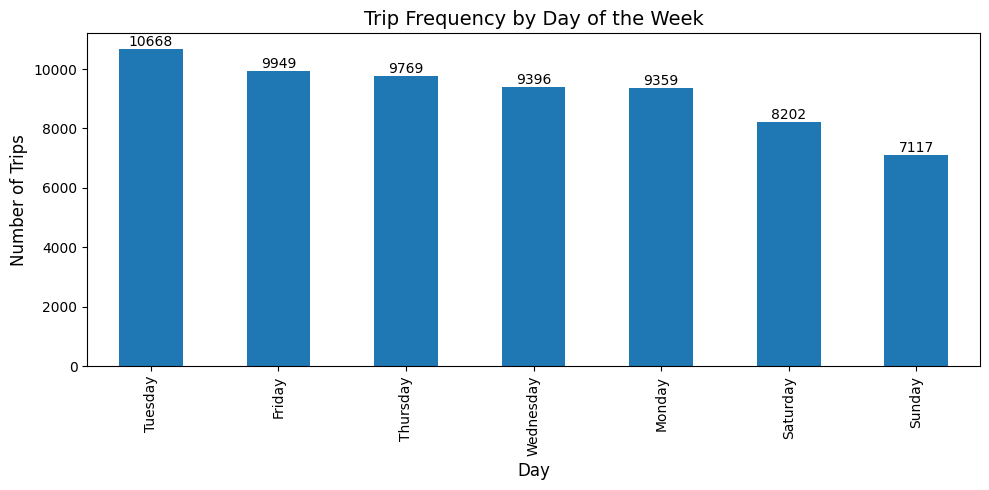

In [657]:
plt.figure(figsize=(10,5)) 
colors = ['#1f77b4']
ax = day_distribution.plot(kind='bar', color=colors) 

plt.title('Trip Frequency by Day of the Week', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black' 
    )
plt.tight_layout()
plt.show()

**Insight:**
1. **Weekdays**: The graph shows that taxi demand is higher on weekdays, with the peak on Tuesday, followed by Friday and Thursday, and slightly lower on Wednesday and Monday. This suggests that taxis are more in demand during the workweek, likely due to people using transportation for work and other business-related activities.

2. **Weekends**: On Saturday and Sunday, demand tends to decrease. This could be because people prefer to enjoy their weekend at home, leading to lower taxi demand compared to weekdays.

**Recommendation:**
1. For Weekdays: Focus on ensuring sufficient taxi availability on Tuesday, Friday, and Thursday to meet higher demand during the workweek.

2. For Weekends: Consider offering promotions or discounts on Saturdays and Sundays to increase demand, as it tends to be lower during weekends.

---

### **5.1.2. Taxi Demand by Time**
- At what time does the busiest taxi travel occur?

In [658]:
hourly_trip_counts = dfn['hour'].value_counts().to_frame().sort_index()
hourly_trip_counts

,count
hour,
00,378
01,916
02,2498
03,3057
04,3329
05,3428
06,3513
07,3562
08,3787


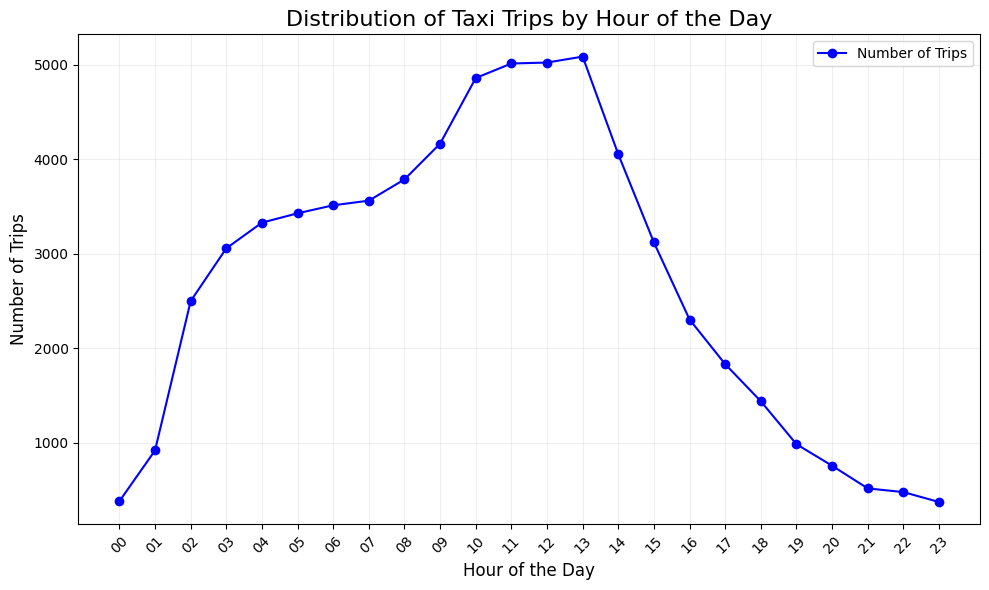

In [659]:
plt.figure(figsize=(10,6))
plt.plot(hourly_trip_counts.index, hourly_trip_counts.values, marker='o', color='b', label='Number of Trips')

plt.title('Distribution of Taxi Trips by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(ticks=range(len(hourly_trip_counts.index)), labels=hourly_trip_counts.index, rotation=45)
plt.grid(True, linestyle='-', alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
1. Trip demand starts to increase significantly from 06:00, peaking around 12:00 to 13:00, with the highest number of trips at 13:00. This peak is likely influenced by morning commutes and lunchtime activities

2. Trip demand drops drastically from 23:00 to 01:00, as most customers are resting or sleeping

**Recommendations for Managing Rush Hours and High-Demand Periods :**

1. **Increase Fleet Size During Peak Hours**
Add more vehicles during peak demand periods, such as between 11:00 AM and 1:00 PM, to reduce customer wait times and enhance satisfaction.
Ensure that the decision to increase fleet size considers operational costs, including fuel, vehicle maintenance, and driver wages.
Leverage the dispatch system by promoting it through targeted advertisements. This will encourage customers to book rides seamlessly, especially during high-demand periods, ensuring efficient allocation of vehicles.
2. **Offer Weekend Discounts to Boost Demand** 
Apply discounts on weekends to encourage customers to travel during times when demand is usually low.
Ensure that the discount considers operational costs (such as fuel, vehicle maintenance, driver wages, and taxes) as well as competitor pricing.
Do not offer discounts during times or in areas with high demand, as customers are likely to book without needing a price reduction.

---

### **5.1.3. Top Pickup & Dropoff Zone**
-  Which pickup and dropoff zones are most frequently selected by customers?

In [660]:
pickup_counts = dfn['pickup_zone'].value_counts().head(5).reset_index()
pickup_counts.columns = ['pickup_zone', 'count']
pickup_counts

,pickup_zone,count
0,East Harlem North,12976
1,East Harlem South,8901
2,Central Harlem,3926
3,Morningside Heights,3831
4,Forest Hills,3796


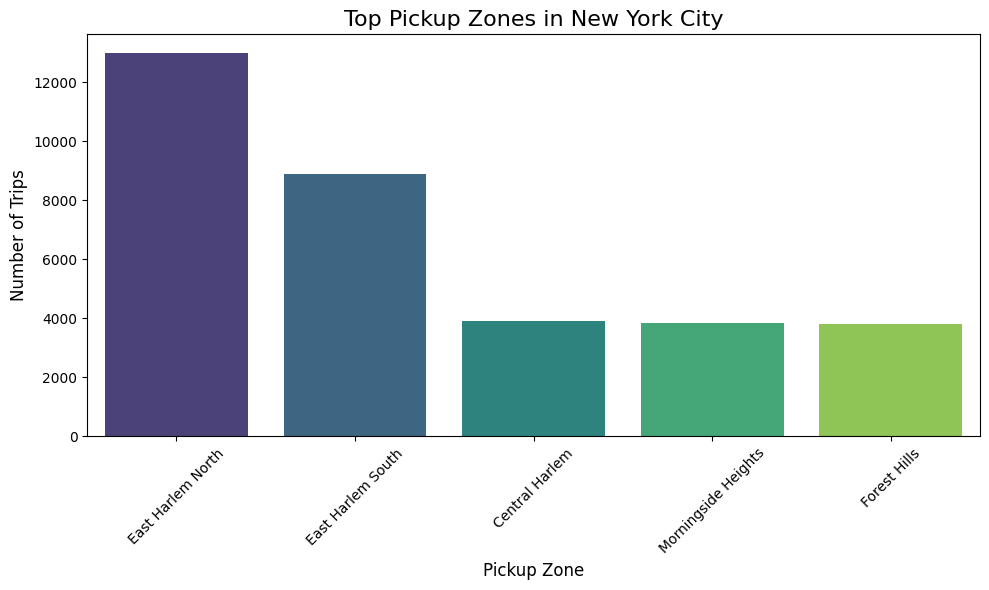

In [661]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pickup_counts, x='pickup_zone', y='count', palette='viridis')
plt.title('Top Pickup Zones in New York City', fontsize=16)
plt.xlabel('Pickup Zone', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

**Insight:**  
1. The chart shows that the top 5 zones with the highest customer pickups are influenced by the unique characteristics of each area:  
   - **East Harlem North** & **East Harlem South**: Known as **"El Barrio"**, a neighborhood with a Latin community and working-class population. It has attractions like **Thomas Jefferson Park**.  
   - **Central Harlem**: The center of African-American history and culture in New York, with famous attractions such as the **Apollo Theater** and the **Studio Museum in Harlem**.  
   - **Morningside Heights**: An area densely populated by residents and university staff due to its proximity to **Columbia University**.  
   - **Forest Hills**: Famous for the **Forest Hills Stadium**, a venue for major music concerts, and close to recreational spots like **Flushing Meadows-Corona Park**.  

These five zones have strong appeal due to a combination of social, cultural, educational, and entertainment activities, making them key areas for customer pickups.

In [662]:
dropoff_counts = dfn['dropoff_zone'].value_counts().head(5).reset_index()
dropoff_counts.columns = ['dropoff_zone', 'count']
dropoff_counts

,dropoff_zone,count
0,East Harlem South,3414
1,East Harlem North,3289
2,Upper East Side North,2732
3,Central Harlem,2550
4,Upper West Side North,2306


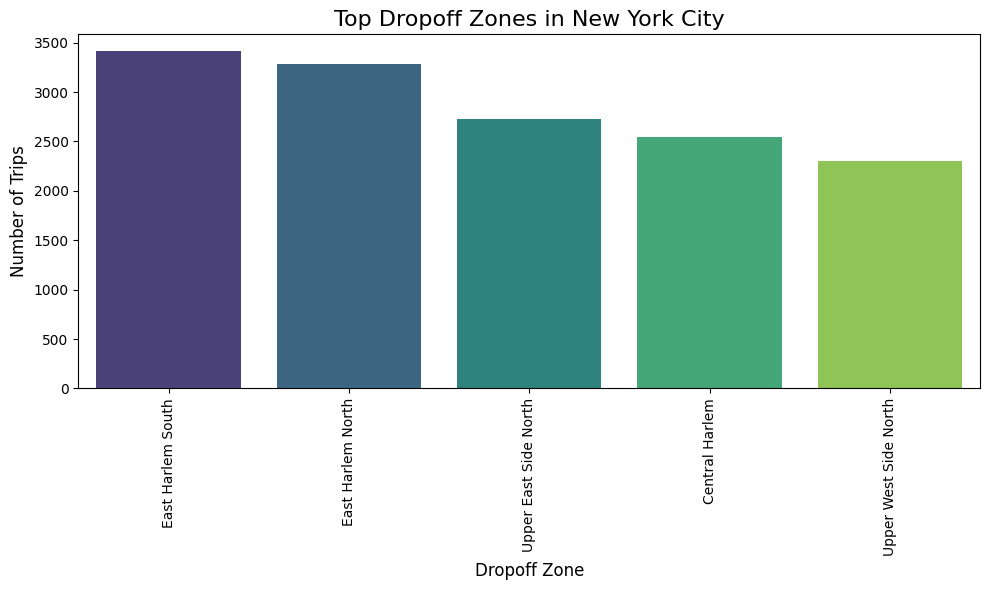

In [663]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dropoff_counts, x='dropoff_zone', y='count', palette='viridis')
plt.title('Top Dropoff Zones in New York City', fontsize=16)
plt.xlabel('Dropoff Zone', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

**Insight Top 5 Dropoff:**  
1. **East Harlem South** and **East Harlem North** have the highest drop-off counts, similar to the pickup zones, due to their densely populated areas with high activity.  
2. **Upper East Side North** is an upscale area known for luxury apartments and a quiet environment.  
3. **Central Harlem** is the center of the African-American community, with iconic cultural landmarks such as the **Apollo Theater**.  
4. **Upper West Side North** is home to upper-middle-class families and is close to **Central Park**, a major attraction.  

These five areas have characteristics that support them as key drop-off destinations, driven by social, cultural, and environmental factors.

**Recommendations for Pick-Up and Drop-Off:**  
1. Improve infrastructure by providing designated pick-up and drop-off areas in these zones to make it easier to find customers and avoid congestion.  
2. Partner with events at entertainment venues like **Central Park** and **Apollo Theater**. For example, offer taxi ride vouchers or discounts to attendees of these events.  
3. Ensure fleet availability to accommodate demand in busy areas, especially during peak hours between 11:00 AM and 12:00 PM.

---
### **5.1.4. Payment Method**
- What payment method is most commonly used by customers?

In [664]:
payment_counts = dfn['payment_type'].value_counts()
payment_counts

payment_type
Credit Card        41875
Cash               21885
Unknown              430
No Charge            221
Payment Dispute       49
Name: count, dtype: int64

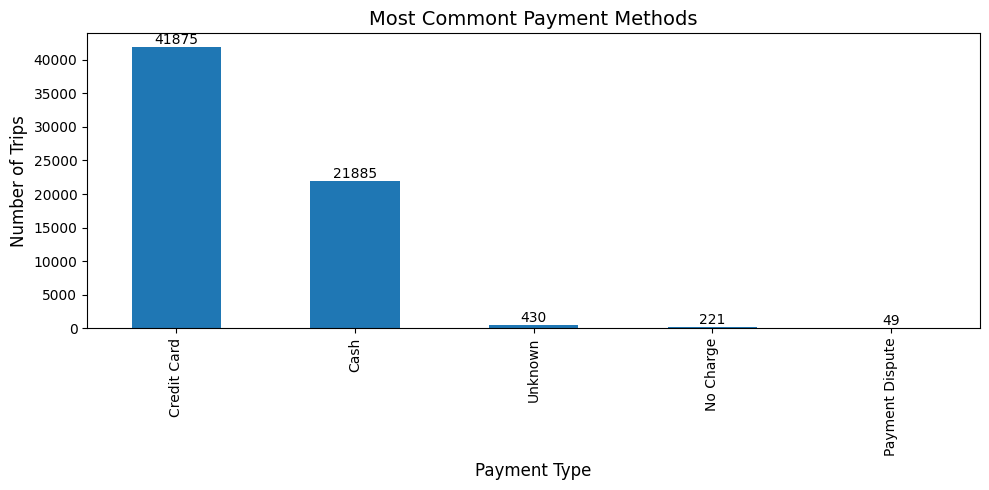

In [665]:
plt.figure(figsize=(10,5)) 
colors = ['#1f77b4']
ax = payment_counts.plot(kind='bar', color=colors) 

plt.title('Most Commont Payment Methods', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black' 
    )

plt.tight_layout()
plt.show()


**Insight Payment Methods:**
1. The most commonly used payment method is **credit card**, indicating customer preference for fast and convenient cashless payments.
2. The second most common payment method is **cash**, while other payment methods are used for special cases.

**Recommendations Payment Methods:**

1. **Optimize the credit card payment process to ensure fast and easy transactions**:
   - Use **contactless payment systems**, where customers can pay by simply tapping their card or phone on the reader, making the transaction faster.
   - Ensure that the card readers are always in good working condition by regularly checking and updating the tools.

2. **Handle cash payments with an efficient system to minimize delays and errors**:
   - Automate transaction recording to ensure quick and accurate processing.
   - Ensure that drivers are able to count money and provide the correct change quickly.

---

### **5.1.5 Order Type**
- MWhat booking method is most frequently used by customers?

In [666]:
trip_type = dfn['trip_type'].value_counts()
trip_type.to_frame()

,count
trip_type,
Street-hail,63713
Dispatch,747


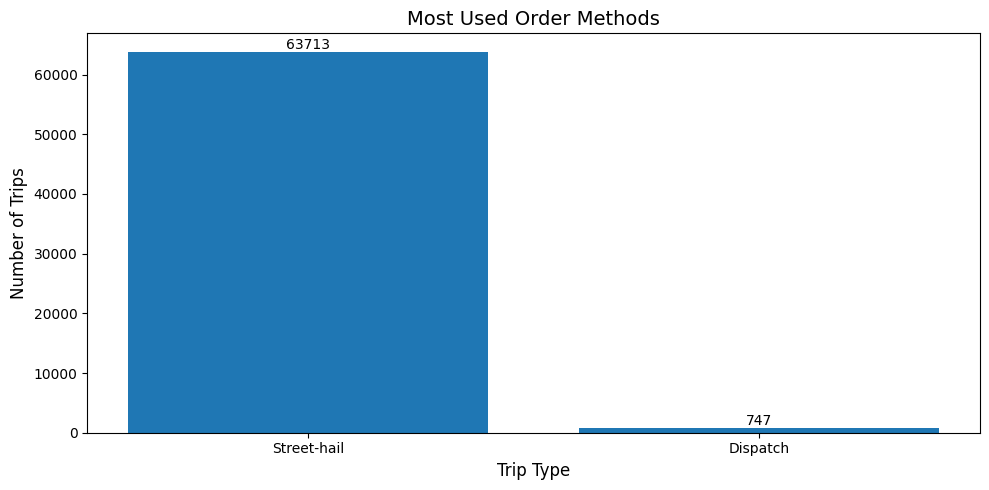

In [667]:
trip_type = {'Street-hail': 63713, 'Dispatch': 747}
plt.figure(figsize=(10,5))
ax = plt.bar(trip_type.keys(), trip_type.values(), color='#1f77b4')
plt.title('Most Used Order Methods', fontsize=14)
plt.xlabel('Trip Type', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

for p in ax:
    plt.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


**Insight:**
> The graph shows that customers more frequently hail a taxi by waving their hands at passing taxis (street-hail) compared to using the phone or app-based dispatch system. This is due to the convenience and speed, as customers can immediately get a taxi without having to wait. In New York, people tend to prefer quick and efficient methods, especially when they are in a hurry or don't want to wait too long.

**Recommendation:** 
1. Given the high demand for street-hail, it is recommended to ensure that more taxis are available in busy and strategic areas, such as business centers and tourist spots.  
2. While street-hail is more dominant, it is important to ensure that the dispatch system operates smoothly, as in more remote or hard-to-reach areas, the app can be a more efficient solution compared to waiting for a taxi that may not pass frequently.  
3. To encourage customers to use the dispatch system, consider offering promotions related to it, such as discounts.

---

## **5.2. Operational & Performance**

### **5.2.1. Total Revenue**


**All values displayed in this chart are in United States Dollar (USD)**

In [668]:
total_revenue = dfn['total_amount'].sum()
print("Total Pendapatan:", total_revenue)

Total Pendapatan: 1387533.5999999999


### **5.2.2. Total Tips**

In [669]:
total_tips = dfn['tip_amount'].sum()
print("Total Tips:", total_tips)

Total Tips: 140498.11000000002


**Insight:**
- Tips contribute as additional income for drivers. Therefore, tips should be maintained by improving service.

**Recommendation:**
1. Train drivers to provide friendly and professional service so that customers are more likely to give tips. Reward drivers with the highest tips to motivate better service.
2. Since most tips are obtained from credit card payments, continue focusing on credit cards as the payment method. Educate and promote credit card usage to customers.

---
### **5.2.3 Impact of Congestion on Trip Duration and Frequency**
- Apakah kemacetan mempengaruhi durasi perjalanan?

In [670]:
avg_duration = dfn.groupby(dfn['congestion_surcharge'] > 0)['duration'].median().reset_index()
avg_duration.columns = ['Has Congestion Surcharge', 'Average Duration']
avg_duration['Has Congestion Surcharge'] = avg_duration['Has Congestion Surcharge'].map({True: 'Yes', False: 'No'})
avg_duration

,Has Congestion Surcharge,Average Duration
0,No,10.108333
1,Yes,15.466667


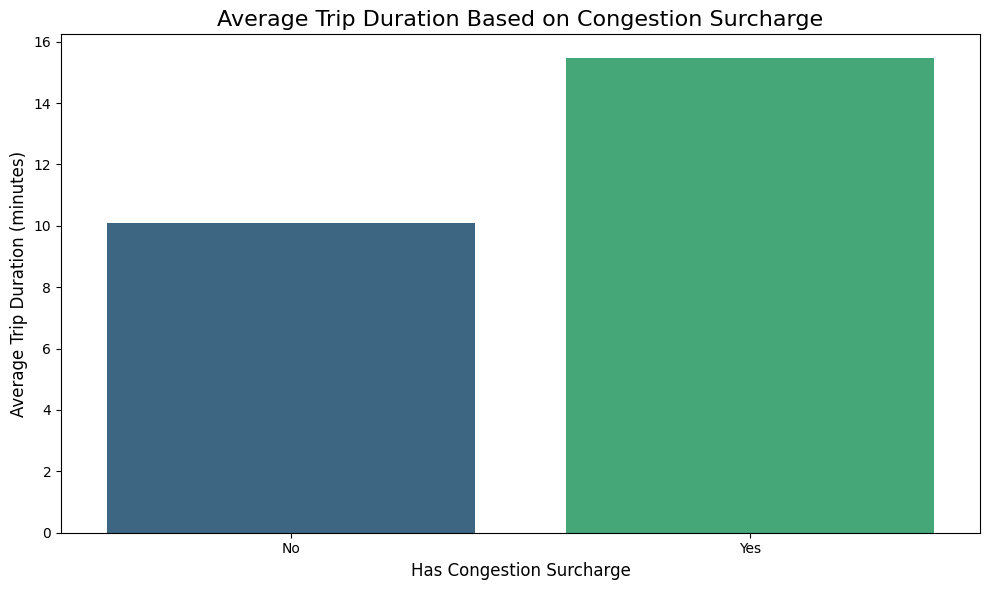

In [671]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_duration, x='Has Congestion Surcharge', y='Average Duration', palette='viridis')
plt.title('Average Trip Duration Based on Congestion Surcharge', fontsize=16)
plt.xlabel('Has Congestion Surcharge', fontsize=12)
plt.ylabel('Average Trip Duration (minutes)', fontsize=12)
plt.tight_layout()
plt.show()


> Trips passing through congested traffic areas affect trip duration, with an average increase of about 15 minutes.

- Is there a difference in trip frequency between those with a surcharge and those without?


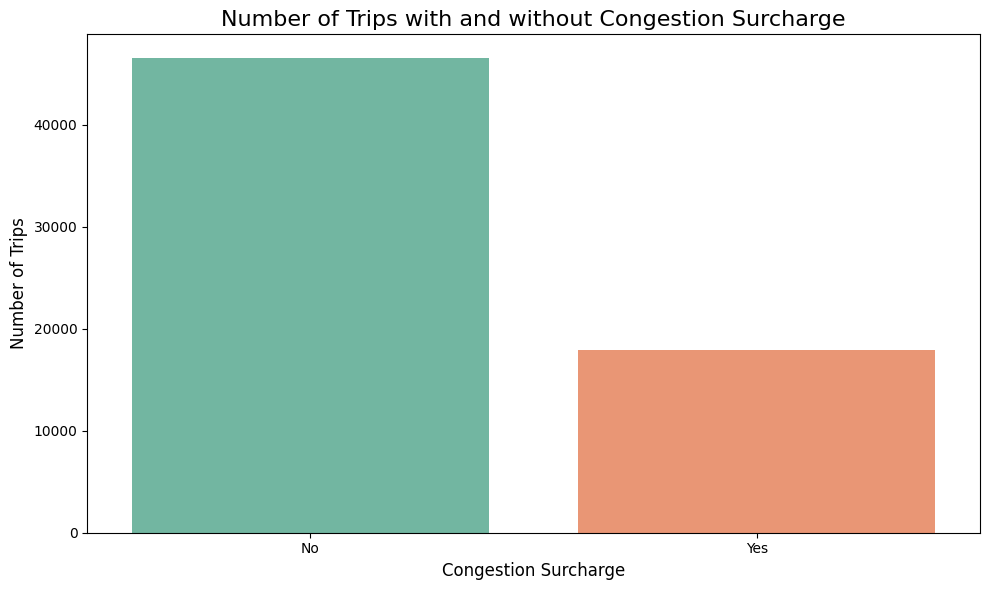

In [672]:
plt.figure(figsize=(10, 6))
sns.countplot(x=(dfn['congestion_surcharge'] > 0), palette='Set2')
plt.title('Number of Trips with and without Congestion Surcharge', fontsize=16)
plt.xlabel('Congestion Surcharge', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


> The graph shows that traffic congestion impacts customer travel behavior, as areas with congestion have lower demand.

**Recommendations for Managing Congestion Impact on Taxi Services:**

1. Provide incentives to drivers working during peak hours or in high-congestion areas to increase fleet availability and compensate for longer wait times. This can help increase trip frequency during periods of high demand, even with congestion.

2. Use navigation apps that can suggest alternative routes with less traffic.

---
### **5.2.4. Average of Total Amount by Vendor**
- How does the average revenue compare across vendors?

In [673]:
pivot_table = dfn.pivot_table(values='total_amount', index='VendorID', aggfunc='median')
pivot_table


,total_amount
VendorID,
"Creative Mobile Technologies, LLC.",16.4
VeriFone Inc.,18.0


### **5.2.5. Total Trip by Vendor**
- What is the total number of trips by vendor?

In [674]:
trip_count = dfn.groupby('VendorID').size().reset_index(name='Trip Count')
trip_count

,VendorID,Trip Count
0,"Creative Mobile Technologies, LLC.",7740
1,VeriFone Inc.,56720


**Insight:**
The vendor with fewer trips (Creative Mobile Technologies) may need more support or promotion to increase visibility and usage of its service. It could be considered to strengthen partnerships or target areas less served by VeriFone Inc.


# **6. Conclusion & Recommendation:**

## **6.1. Conclusion:**

The analysis reveals key patterns in taxi demand, and performance indicator:

1. Weekday vs Weekend Demand: Taxi demand is higher during weekdays, with a notable peak on Tuesday, followed by Friday and Thursday. This suggests that taxis are primarily used for work-related activities. On weekends, demand decreases as people prefer to stay home, highlighting an opportunity to increase demand through promotions or targeted services on weekends.

2. Time-based Demand Patterns: Taxi demand spikes in the early morning, peaking between 12:00 and 13:00, likely driven by commuter traffic and lunchtime activities. However, demand drops significantly late at night, indicating lower travel needs during these hours, which could suggest a more efficient use of resources during these times.

3. Key Pickup and Dropoff Zones: Certain areas, such as East Harlem and Central Harlem, attract high demand for pickups and drop-offs due to their cultural, social, and entertainment significance. These zones are crucial for optimizing fleet allocation, ensuring taxis are available in areas with high customer activity.

4. Payment Preferences: Credit cards are the preferred payment method, reflecting a growing demand for convenient, cashless transactions. Cash remains the second most common payment method, indicating some preference for traditional payment methods. Understanding this behavior is essential for improving customer experience and payment system efficiency.

5. Trip Behavior and Congestion: Traffic congestion has a significant impact on trip durations, adding an average of 15 minutes to travel time. Congested areas also show lower taxi demand, suggesting that drivers and customers prefer to avoid such areas. Efficient routing and offering incentives during high-congestion periods could help mitigate these effects.

## **6.2. Recommendation:**
**Recommendations for Managing Rush Hours and High-Demand Periods:**

1. Increase Fleet Size During Peak Hours:
Add more vehicles during peak demand periods, such as between 11:00 AM and 1:00 PM, to reduce customer wait times and enhance satisfaction.
Ensure that the decision to increase fleet size considers operational costs, including fuel, vehicle maintenance, and driver wages.
Leverage the dispatch system by promoting it through targeted advertisements. This will encourage customers to book rides seamlessly, especially during high-demand periods, ensuring efficient vehicle allocation.
Offer Weekend Discounts to Boost Demand:

2. Apply discounts on weekends to encourage customers to travel during times when demand is usually low.
Ensure that the discount considers operational costs (such as fuel, vehicle maintenance, driver wages, and taxes) as well as competitor pricing.
Avoid offering discounts during times or in areas with high demand, as customers are likely to book without needing a price reduction.

3. Weekdays: Focus on ensuring sufficient taxi availability on Tuesday, Friday, and Thursday to meet the higher demand during the workweek.
4. Weekends: Consider offering promotions or discounts on Saturdays and Sundays to increase demand, as it tends to be lower during weekends.


**2. Recommendations for Pick-Up and Drop-Off:**

1. Improve infrastructure by providing designated pick-up and drop-off areas in high-demand zones to make it easier to find customers and avoid congestion.
2. Partner with events at entertainment venues like Central Park and Apollo Theater. Offer taxi ride vouchers or discounts to attendees of these events.
3. Ensure fleet availability to accommodate demand in busy areas, especially during peak hours between 11:00 AM and 12:00 PM.



**3.Recommendations for Tips and Payment Methods:**
1. Train drivers to provide friendly and professional service so that customers are more likely to give tips. Reward drivers with the highest tips to motivate better service.
2. Continue focusing on credit card payments as most tips are obtained from credit card transactions. Promote and educate customers to use credit cards for convenience.


**4.Recommendations for Optimizing Payment Systems:**

1. Optimize the credit card payment process to ensure fast and easy transactions:
2. Use contactless payment systems, where customers can pay by simply tapping their card or phone on the reader, making the transaction faster.
Ensure that card readers are always in good working condition by regularly checking and updating the tools.
3. Handle cash payments efficiently to minimize delays and errors: Automate transaction recording to ensure quick and accurate processing.
4. Ensure that drivers are able to count money and provide the correct change quickly.

**5. Recommendations for Street-Hail and Dispatch System:**

1. Ensure more taxis are available in busy and strategic areas, such as business centers and tourist spots, where street-hail demand is high.
2. While street-hail is dominant, ensure that the dispatch system operates smoothly in more remote or hard-to-reach areas, where app-based booking can be more efficient.
3. To encourage customers to use the dispatch system, consider offering promotions, such as discounts, for app-based bookings.

**6. Recommendations for Managing Congestion Impact on Taxi Services:**
1. Provide incentives to drivers working during peak hours or in high-congestion areas to increase fleet availability and compensate for longer wait times. This can help increase trip frequency during periods of high demand, even with congestion.
2. se navigation apps that can suggest alternative routes with less traffic to mitigate delays caused by congestion.